In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as ft
from scipy.ndimage.filters import uniform_filter1d
%matplotlib inline

In [2]:
#Load data
incandescent_pixel, incandescent = np.loadtxt('RDPixIncandescent00000.txt', comments='#', skiprows=17, unpack=True)
fluorescent_pixel, fluorescent = np.loadtxt('RDPixFluorescent00000.txt', comments='#', skiprows=17, unpack=True)
neon_pixel, neon_1 = np.loadtxt('RDPixNeon00000.txt', comments='#', skiprows=17, unpack=True)
hydrogen_pixel, hydrogen_1 = np.loadtxt('RDPixHydrogen00000.txt', comments='#', skiprows=17, unpack=True)
sun_pixel, sun = np.loadtxt('RDPixDirectSun00000.txt', comments='#', skiprows=17, unpack=True)
dark_pixel, dark_1 = np.loadtxt('RDPixDark00000.txt', comments='#', skiprows=17, unpack=True)

#Load extra data
uv_pixel, uv = np.loadtxt('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Extra Spectra/uv_light.txt', comments='#', skiprows=17, unpack=True)
cheap_glasses_pixel, cheap_glasses = np.loadtxt('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Extra Spectra/cheap_glasses.txt', comments='#', skiprows=17, unpack=True)
ozzy_uv_pixel, ozzy_uv = np.loadtxt('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Extra Spectra/ozzy_glasses.txt', comments='#', skiprows=17, unpack=True)
blue_glass_uv_pixel, blue_glass_uv = np.loadtxt('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Extra Spectra/nice_blue_glasses.txt', comments='#', skiprows=17, unpack=True)
darks_glasses_pixel, darks_glasses = np.loadtxt('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Extra Spectra/darks_of_glasses.txt', comments='#', skiprows=17, unpack=True)
dead_leaf_pixel, dead_leaf = np.loadtxt('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Extra Spectra/RDPixDeadLeafIncandescent00000.txt', comments='#', skiprows=17, unpack=True)
leaf_pixel, leaf = np.loadtxt('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Extra Spectra/RDPixLiveLeafIncandescent00000.txt', comments='#', skiprows=17, unpack=True)

In [3]:
#Errors for each dataset - Poissonian error
incandescent_avgrun_err = np.sqrt(incandescent)/100
fluorescent_err = np.sqrt(fluorescent)/100
hydrogen_err = np.sqrt(hydrogen_1)/100
neon_err = np.sqrt(neon_1)/100
sun_err = np.sqrt(sun)/100
dark_avgrun_err = np.sqrt(dark_1)/100

#Errors for extras 
uv_err = np.sqrt(uv)/100
cheap_glasses_err = np.sqrt(cheap_glasses)/100
ozzy_uv_err = np.sqrt(ozzy_uv)/100
blue_glass_uv_err = np.sqrt(blue_glass_uv)/100
darks_glasses_err = np.sqrt(darks_glasses)/100
dead_leaf_err = np.sqrt(dead_leaf)/100
leaf_err = np.sqrt(leaf)/100

Text(0.5,1,'Dark Spectrum')

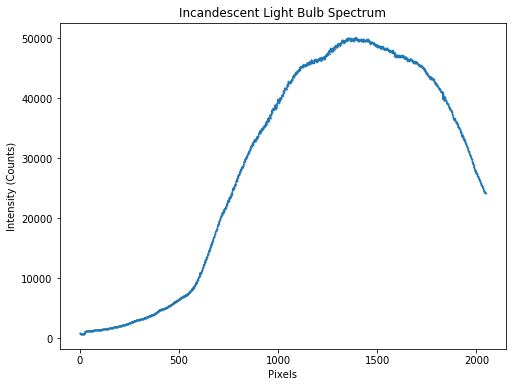

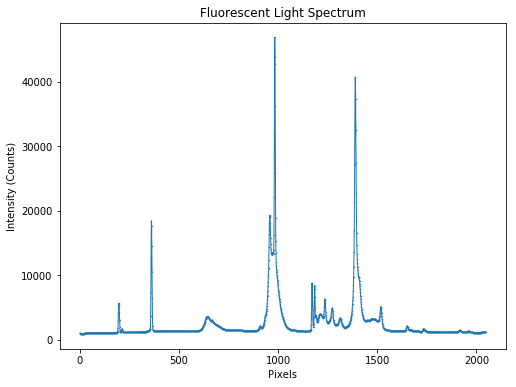

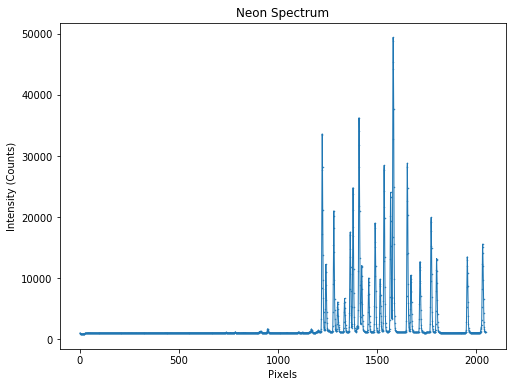

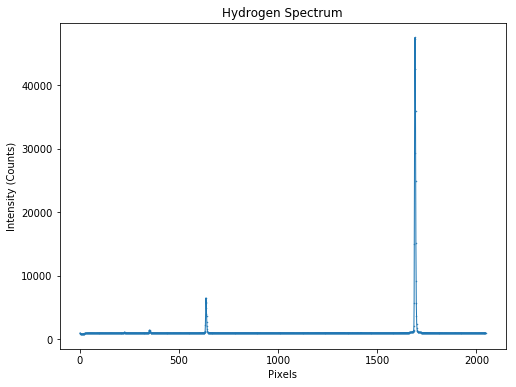

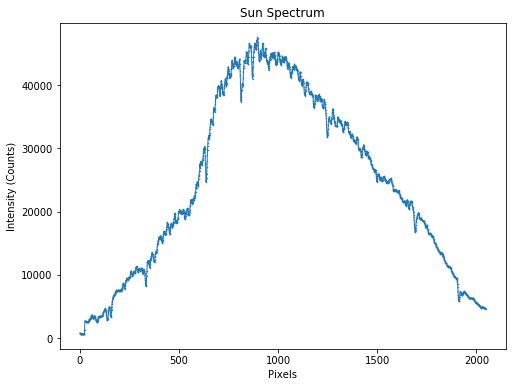

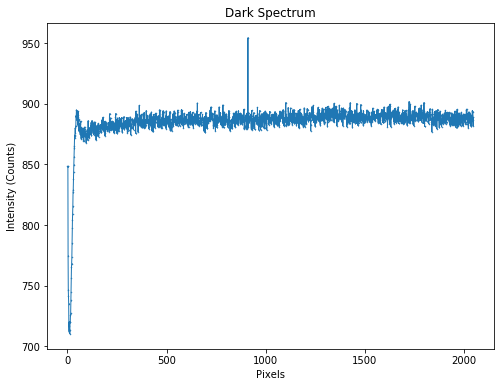

In [4]:
#Plot the data
plt.figure(figsize=(8,6))
plt.errorbar(incandescent_pixel, incandescent, xerr=None, yerr=incandescent_avgrun_err, marker='o', markersize=0.5, lw=1)
plt.xlabel('Pixels')
plt.ylabel('Intensity (Counts)')
plt.title('Incandescent Light Bulb Spectrum')
plt.figure(figsize=(8,6))
plt.errorbar(fluorescent_pixel, fluorescent, xerr=None, yerr=fluorescent_err, marker='o', markersize=0.5, lw=1)
plt.xlabel('Pixels')
plt.ylabel('Intensity (Counts)')
plt.title('Fluorescent Light Spectrum')
plt.figure(figsize=(8,6))
plt.errorbar(neon_pixel, neon_1, xerr=None, yerr=neon_err, marker='o', markersize=0.5, lw=1)
plt.xlabel('Pixels')
plt.ylabel('Intensity (Counts)')
plt.title('Neon Spectrum')
plt.savefig('neon_calibration.pdf')
plt.figure(figsize=(8,6))
plt.errorbar(hydrogen_pixel, hydrogen_1, xerr=None, yerr=hydrogen_err, marker='o', markersize=0.5, lw=1)
plt.xlabel('Pixels')
plt.ylabel('Intensity (Counts)')
plt.title('Hydrogen Spectrum')
plt.savefig('hydrogen_calibration.pdf')
plt.figure(figsize=(8,6))
plt.errorbar(sun_pixel, sun, xerr=None, yerr=sun_err, marker='o', markersize=0.5, lw=1)
plt.xlabel('Pixels')
plt.ylabel('Intensity (Counts)')
plt.title('Sun Spectrum')
plt.figure(figsize=(8,6))
plt.errorbar(dark_pixel, dark_1, xerr=None, yerr=dark_avgrun_err, marker='o', markersize=0.5, lw=1)
plt.xlabel('Pixels')
plt.ylabel('Intensity (Counts)')
plt.title('Dark Spectrum')

In [1]:
#Andy's function for loading data for centroids: Here we load the files 
def filereader(filename):
    file = np.loadtxt(filename, comments = '#', skiprows = 17, unpack =True)
    afile = file[0] #This brings the pixel values into one array
    bfile = file[1] #This brings the intesity values into one array
    cfile = np.vstack((afile,bfile)) #This puts the pixel values and the intensity values into one array
    return cfile

#Load data for centroids
hydrogen = filereader('RDPixHydrogen00000.txt')
neon = filereader('RDPixNeon00000.txt')

#Andy's function for peak and centroid finding: Peak calculator using the help
def centfinder(x):
    threshold = 2700 #Choose an appropriate threshold based on what the data looks like
    pixels = x[0,:]
    intensity = x[1,:]
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
                
    #Calculate the FWHM to compute the size of the peak that we will care about, and then the centroid
    cen = []
    for i in range(len(peaksy)):
        halfmax = peaksy[i]/2
        peak_index = peak_dex.index(peaksy[i])
        pind=(list(inversep_dex)).index(peaksy[i])
        
        for i in range(len((intensity[0:pind]))):
            xmin = (inversep_dex[pind:-1][i] - halfmax)
            xmins = peak_index-i+1
            if xmin < 0:
                break

        for i in range(len((intensity[0:peak_index] - halfmax))):
            xmax = (intensity[peak_index:-1][i] - halfmax)
            xmaxs = peak_index+i-1
            if xmax < 0:
                break
        
        x_range = x[0][xmins:xmaxs]
        y_range = x[1][xmins:xmaxs]

        frequency = np.sum(x_range*y_range)/ np.sum(y_range)
        frequency
        cen.append(frequency)
    return cen

#Find the centroids for the neon and hydrogen spectra
hydrogen_centroids = centfinder(hydrogen)
neon_centroids = centfinder(neon)
print(hydrogen_centroids)
print(neon_centroids)

NameError: name 'np' is not defined

In [6]:
#Make array of known hydrogen wavelengths corresponding to intensities (nm)
known_hydrogen = np.array((np.mean((486.12786, 486.12870, 486.13615)), np.mean((656.27110, 656.27248, 656.28518))))
print(known_hydrogen)

[486.13090333 656.27625333]


In [7]:
#Make array of known neon wavelengths corresponding to intensities (nm)
known_neon = np.array((585.24879, 588.18952, 594.48342, 597.508065, 602.99969, 607.43377, 609.61631, 614.30626, 616.35939, 621.72812, 626.6495, 630.47889, 633.44278, 638.29917, 640.2248, 650.65281, 653.28822, 659.89529, 667.82762, 671.7043, 692.94673, 703.24131))
print(known_neon)

[585.24879  588.18952  594.48342  597.508065 602.99969  607.43377
 609.61631  614.30626  616.35939  621.72812  626.6495   630.47889
 633.44278  638.29917  640.2248   650.65281  653.28822  659.89529
 667.82762  671.7043   692.94673  703.24131 ]


In [8]:
#Make an array of the centroids of hydrogen and neon
pixel_data = np.append(hydrogen_centroids, neon_centroids)
#Sort the data so that it will be plotted in order
pixel_data_sorted = np.sort(pixel_data)

In [9]:
#Make an array of the corresponding wavelengths of hydrogen and neon 
wavelength_data = np.append(known_hydrogen, known_neon)
#Sort the data so that it will be plotted in order
wavelength_data_sorted = np.sort(wavelength_data)

Text(0.5,1,'Wavelength Solution')

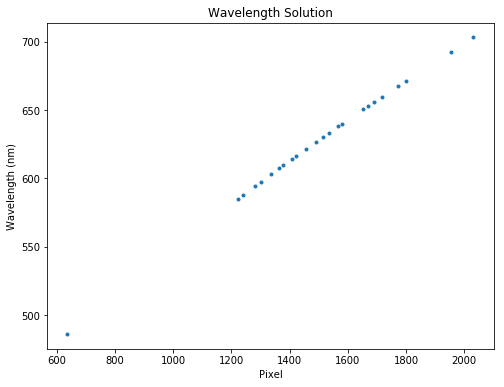

In [10]:
#Plot the pixel data on the x-axis and the wavelength data on the y-axis to get an idea for what kind of fit to try
plt.figure(figsize=(8,6))
plt.plot(pixel_data_sorted, wavelength_data_sorted, ls = '', marker='o', markersize=3)
plt.xlabel('Pixel')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Solution')

In [11]:
#Data looks linear, so try a linear fit, using linear fit code written for Lab 2
#Define linear model function, y = wavelength data, x = pixel data, a = p0 = slope, b = p1 = y-intercept
def model_linear(x,a,b): 
    return a*x + b

#Define functions for initial conditions
#Function for p0 (slope)
def p0(x,y,n):
    p0 = ((n*np.sum(x*y)) - (np.sum(x)*np.sum(y)))/((n*np.sum(x**2)) - ((np.sum(x))**2))
    return p0

#Function for p1 (y-intercept)
def p1(x,y,n,p):
    p1 = (1/n)*(np.sum(y) - p*np.sum(x))
    return p1

In [12]:
#Error functions for slope and y-intercept
#Function for variance (measurement error), residuals are calculated, n is number of measurements
def sigma_squared(residuals,n): 
    sigma_squared = (1/(n - 2))*(np.sum(residuals)**2)
    return sigma_squared

#Function for error in the slope, x = pixel data, n = number of measurements, sigma_squared = measurement error
def sigma_m(x,n,sigma_squared):
    sigma_m = np.sqrt((n*sigma_squared)/((n*np.sum(x**2)) - (np.sum(x))**2))
    return sigma_m

#Function for error in y-intercept, x = pixel data, n = number of measurements, sigma_squared = measurement error
def sigma_c(x, n, sigma_squared):
    sigma_c = np.sqrt((sigma_squared*np.sum(x**2))/((n*np.sum(x**2)) - (np.sum(x))**2))
    return sigma_c

In [13]:
#Calculate initial conditions
p0_linear = p0(pixel_data_sorted, wavelength_data_sorted, 24)
p1_linear = p1(pixel_data_sorted, wavelength_data_sorted, 24, p0_linear)

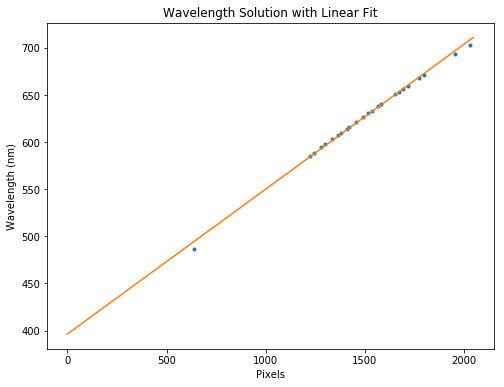

In [14]:
#Plot the wavelength solution with the linear fit
x_array = np.arange(0, 2048) #Make array for x-axis that is the length of the domain
plt.figure(figsize=(8,6))
#Plot the data
plt.plot(pixel_data_sorted, wavelength_data_sorted, ls = '', marker='o', markersize=3)
#Plot the linear fit 
plt.plot(x_array, model_linear(x_array, p0_linear, p1_linear))
plt.xlabel('Pixels')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Solution with Linear Fit')
plt.savefig('wavelength_linfit.pdf')

In [15]:
#Calculate the residuals from the linear fit
linear_fit = model_linear(x_array, p0_linear, p1_linear)
residuals_linear = []
for i in range(0,24): #Subtract the linear fit from the data points to find the error in the fit
    residuals_linear.append(-linear_fit[np.int(pixel_data_sorted[i])-1] + wavelength_data_sorted[i])

In [16]:
#Calculate errors in parameters for linear fit
lin_mes_err = sigma_squared(residuals_linear, 24)
lin_slope_err = sigma_m(pixel_data_sorted, 24, lin_mes_err)
lin_intercept_err = sigma_c(pixel_data_sorted, 24, lin_mes_err)
print("The measurement error for the wavelength solution with a linear fit is", lin_mes_err, ", the uncertainty in the slope parameter is", lin_slope_err, ", and the uncertainty in the y-intercept parameter is", lin_intercept_err, ".")

The measurement error for the wavelength solution with a linear fit is 1.223897236047654 , the uncertainty in the slope parameter is 0.0008121090735348117 , and the uncertainty in the y-intercept parameter is 1.239376261490604 .


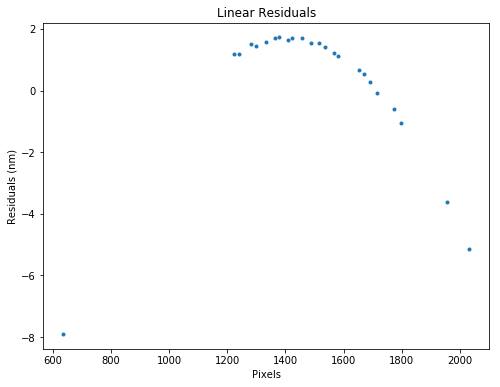

In [17]:
#Plot the linear residuals
plt.figure(figsize=(8,6))
plt.plot(pixel_data_sorted, residuals_linear, ls='', marker='o', markersize=3)
plt.title('Linear Residuals')
plt.xlabel('Pixels')
plt.ylabel('Residuals (nm)')
plt.savefig('linear_residuals.pdf')

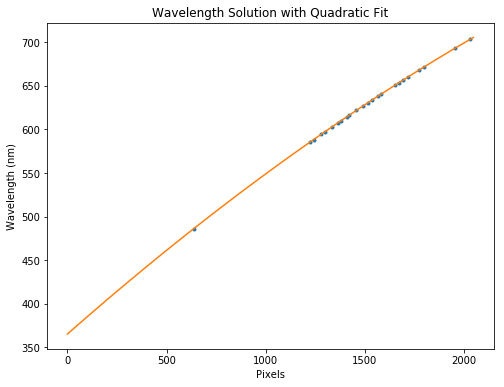

In [18]:
#The residuals look quadratic, so try a quadratic fit
#Construct the matrices
ma = np.array([[np.sum(pixel_data_sorted**4), np.sum(pixel_data_sorted**3), np.sum(pixel_data_sorted**2)], [np.sum(pixel_data_sorted**3), np.sum(pixel_data_sorted**2), np.sum(pixel_data_sorted)], [np.sum(pixel_data_sorted**2), np.sum(pixel_data_sorted), len(pixel_data_sorted)]])
mc = np.array([[np.sum((pixel_data_sorted**2)*wavelength_data_sorted)], [np.sum(pixel_data_sorted*wavelength_data_sorted)], [np.sum(wavelength_data_sorted)]])

#Compute the parameters
mai = np.linalg.inv(ma)
md = np.dot(mai, mc)

#Plot the best fit line
afit = md[1,0]
bfit = md[2,0]
cfit = md[0,0]
plt.figure(figsize=(8,6))
#Plot the data
plt.plot(pixel_data_sorted, wavelength_data_sorted, ls = '', marker='o', markersize=3)
#Plot the quadratic fit
plt.plot(x_array, (afit*x_array + bfit + cfit*(x_array**2)))
plt.title('Wavelength Solution with Quadratic Fit')
plt.xlabel('Pixels')
plt.ylabel('Wavelength (nm)')
plt.savefig('wavelength_quadfit.pdf')

In [19]:
#Calculate residuals from the quadratic fit
quad_fit = afit*x_array + bfit + cfit*(x_array**2)
residuals_quadratic = []
for i in range(0,24): #Subtract the fit from the data points
    residuals_quadratic.append(-quad_fit[np.int(pixel_data_sorted[i]) - 1] + wavelength_data_sorted[i])

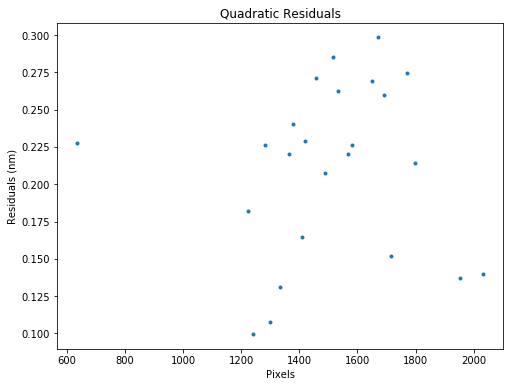

In [20]:
#Plot the quadratic residuals - look normally distributed, so don't have to do higher-order fit
plt.figure(figsize=(8,6))
plt.plot(pixel_data_sorted, residuals_quadratic, ls='', marker='o', markersize=3)
plt.title('Quadratic Residuals')
plt.xlabel('Pixels')
plt.ylabel('Residuals (nm)')
plt.savefig('quad_residuals.pdf')

In [21]:
#Load the 100 incandescent spectra
incandescent_filenames = sorted(glob.glob("/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/100 Incandescent for Readout/incandescent*.txt")) #Import all of the files with the beginning 'incandescent' and the end '.txt'

incandescent_100runs_pixels=[] #Create empty list for pixel data to be appended to 
incandescent_100_runs = [] #Create empty list for intensity data to be appended to
for filename in incandescent_filenames: #Iterate through all of the filenames
    incandescent_100_runs.append(np.genfromtxt(filename,float, skip_header=17, skip_footer=1, usecols=(1))) #Append the data in each of the files appropriate list
    incandescent_100runs_pixels.append(np.genfromtxt(filename,float, skip_header=17, skip_footer=1, usecols=(0)))

#Turn the lists of data into arrays
incandescent_100_array = np.array([incandescent_100_runs]) 
incandescent_100pixel_array = np.array([incandescent_100runs_pixels])

In [22]:
#Load the 100 dark spectra
dark_filenames = sorted(glob.glob("/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/100 Darks 9ms for Readout/dark*.txt")) #Import all of the files with the beginning 'dark' and the end '.txt'

dark_100runs_pixels=[] #Create empty list for pixel data to be appended to
dark_100_runs = [] #Create empty list for intensity data to be appended to
for filename in dark_filenames: #Iterate through all of the filenames
    dark_100_runs.append(np.genfromtxt(filename,float, skip_header=17, skip_footer=1, usecols=(1))) #Append the data in each of the files to appropriate list
    dark_100runs_pixels.append(np.genfromtxt(filename,float, skip_header=17, skip_footer=1, usecols=(0)))

#Turn the lists of data into arrays
dark_100_array = np.array([dark_100_runs]) 
dark_100pixel_array = np.array([dark_100runs_pixels])

In [23]:
#Calculate the mean and variance along the pixels
#Bright data
incandescents_mean = np.mean(incandescent_100_array, axis=1) 
#Flatten the array to get rid of empty extra dimension
flat_bright_mean = np.ndarray.flatten(incandescents_mean)
incandescents_var = np.var(incandescent_100_array, axis=1)
#Flatten the array to get rid of empty extra dimension
flat_bright_var = np.ndarray.flatten(incandescents_var)

#Darks
darks_mean = np.mean(dark_100_array, axis=1)
#Flatten the array to get rid of empty extra dimension
flat_dark_mean = np.ndarray.flatten(darks_mean)
darks_var = np.var(dark_100_array, axis=1)
#Flatten the array to get rid of empty extra dimension
flat_dark_var = np.ndarray.flatten(darks_var)

In [24]:
#Define functions for calculating gain and readout noise
#Gain: var_bright = variance of the incandescent spectra, Nph = variance in the photon count
def gain(var_bright, Nph):
    G = Nph/var_bright
    return G

#Readout noise: var_dark = variance of the dark spectra, G = gain calculated above
def readout(var_dark, G):
    R = var_dark*(G**2)
    return R

In [25]:
#Calculate gain and readout of spectrometer
gain_spectrometer = gain(flat_bright_var, np.sqrt(flat_bright_mean))
readout_spectrometer = readout(flat_dark_var, gain_spectrometer)

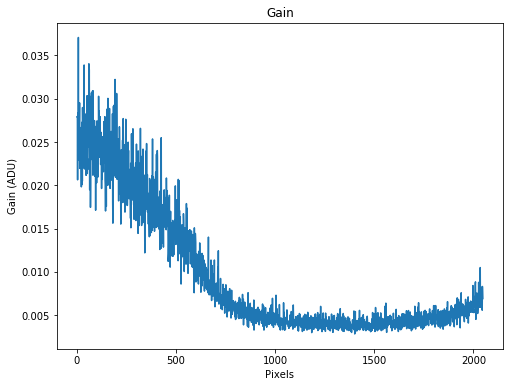

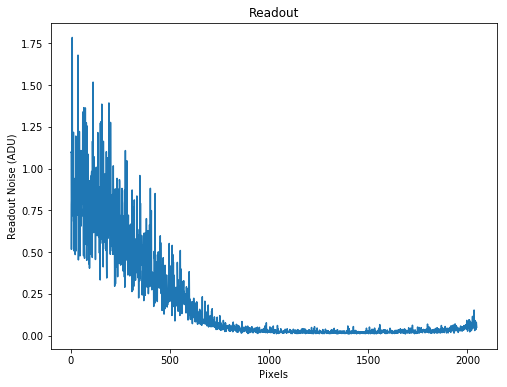

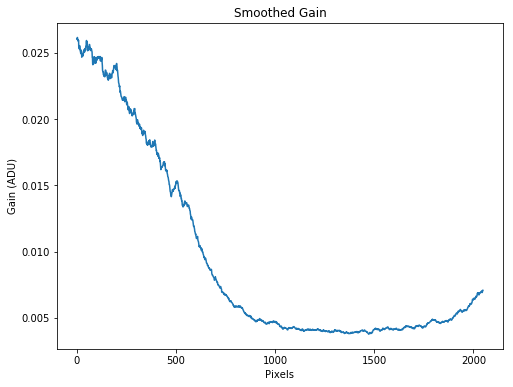

In [26]:
#Plot the gain and readout noise vs. pixel number 
plt.figure(figsize=(8,6))
plt.plot(gain_spectrometer)
plt.title('Gain')
plt.xlabel('Pixels')
plt.ylabel('Gain (ADU)')
plt.savefig('gain.pdf')
plt.figure(figsize=(8,6))
plt.plot(readout_spectrometer)
plt.title('Readout')
plt.xlabel('Pixels')
plt.ylabel('Readout Noise (ADU)')
plt.savefig('readout.pdf')

#The gain function is quite noisy, so smooth it and use this smoothed gain for noise reduction
plt.figure(figsize=(8,6))
plt.plot(uniform_filter1d(gain_spectrometer, 32))
plt.title('Smoothed Gain')
plt.xlabel('Pixels')
plt.ylabel('Gain (ADU)')
plt.savefig('smooth_gain.pdf')

smooth_gain = uniform_filter1d(gain_spectrometer, 32)

In [110]:
#Correct all spectra by subtracting flats and dividing by gain (reference spectrum)
incandescent_corrected = (incandescent - dark_1)/smooth_gain
fluorescent_corrected = (fluorescent - dark_1)/smooth_gain
hydrogen_corrected = (hydrogen_1 - dark_1)/smooth_gain
neon_corrected = (neon_1 - dark_1)/smooth_gain
sun_corrected = (sun - dark_1)/smooth_gain

#Extra data 
uv_corrected = (uv - darks_glasses)/smooth_gain
cheap_glasses_corrected = (cheap_glasses - darks_glasses)/smooth_gain
ozzy_uv_corrected = (ozzy_uv - darks_glasses)/smooth_gain
blue_glass_uv_corrected = (blue_glass_uv - darks_glasses)/smooth_gain
dead_leaf_corrected = (dead_leaf - dark_1)/smooth_gain
leaf_corrected = (leaf - dark_1)/smooth_gain

In [111]:
#Error propagation for corrected spectra
#Define function for quadrature
def correct_spec_err(correct, pixel, dark, pixel_err, dark_err):
    error = correct*(np.sqrt(pixel_err**2 + dark_err**2)/(pixel - dark))
    return error 

#Calculate all errors
incandescent_corrected_err = correct_spec_err(incandescent_corrected, incandescent, dark_1, incandescent_avgrun_err, readout_spectrometer)
fluorescent_corrected_err = correct_spec_err(fluorescent_corrected, fluorescent, dark_1, fluorescent_err, readout_spectrometer)
hydrogen_corrected_err = correct_spec_err(hydrogen_corrected, hydrogen_1, dark_1, hydrogen_err, readout_spectrometer)
neon_corrected_err = correct_spec_err(neon_corrected, neon_1, dark_1, neon_err, readout_spectrometer)
sun_corrected_err = correct_spec_err(sun_corrected, sun, dark_1, sun_err, readout_spectrometer)
uv_corrected_err = correct_spec_err(uv_corrected, uv, darks_glasses, uv_err, readout_spectrometer)
cheap_glasses_corrected_err = correct_spec_err(cheap_glasses_corrected, cheap_glasses, darks_glasses, cheap_glasses_err, readout_spectrometer)
ozzy_uv_corrected_err = correct_spec_err(ozzy_uv_corrected, ozzy_uv, darks_glasses, ozzy_uv_err, readout_spectrometer)
blue_glass_corrected_err = correct_spec_err(blue_glass_uv_corrected, blue_glass_uv, darks_glasses, blue_glass_uv_err, readout_spectrometer)
dead_leaf_corrected_err = correct_spec_err(dead_leaf_corrected, dead_leaf, dark_1, dead_leaf_err, readout_spectrometer)
leaf_corrected_err = correct_spec_err(leaf_corrected, leaf, dark_1, leaf_err, readout_spectrometer)

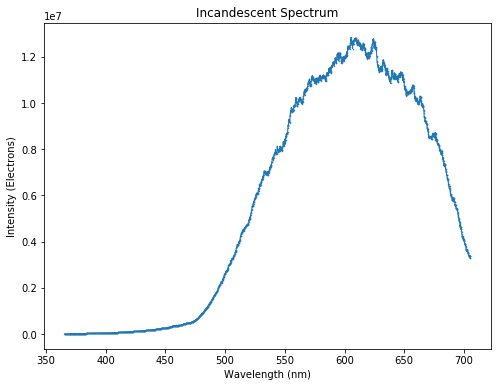

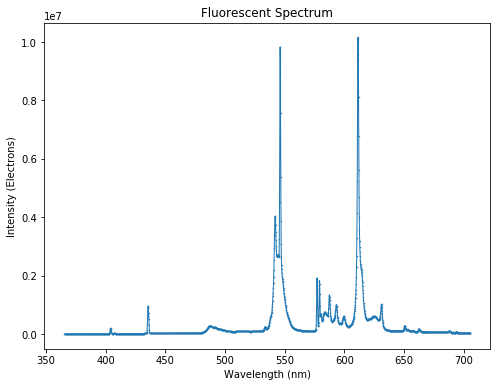

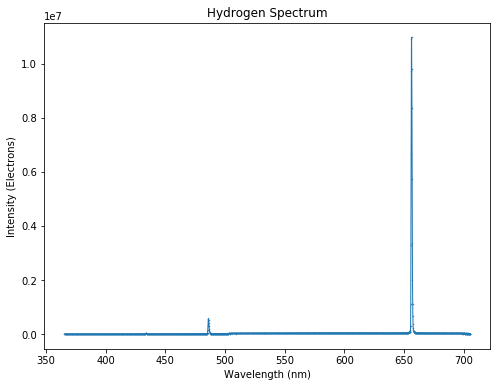

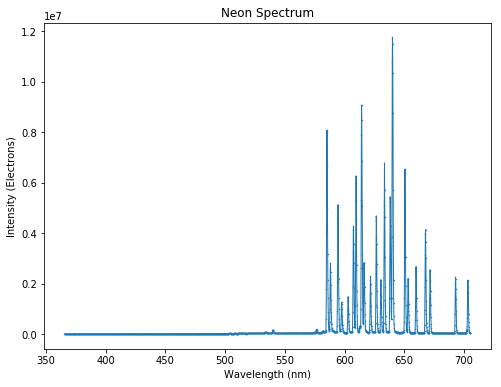

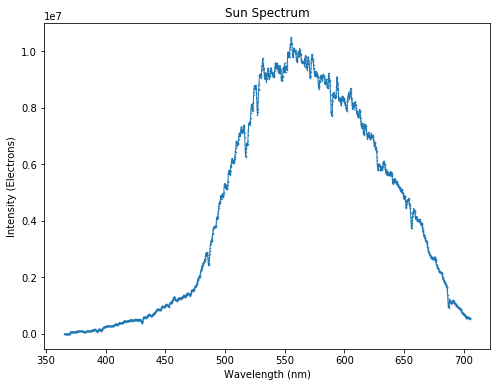

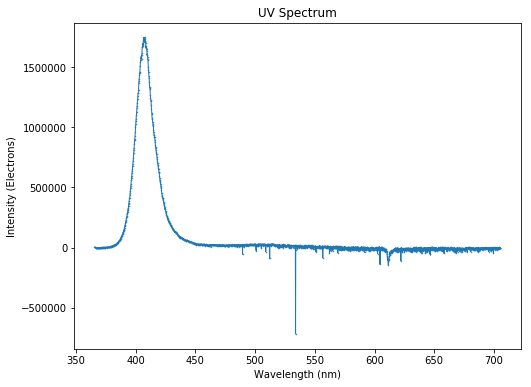

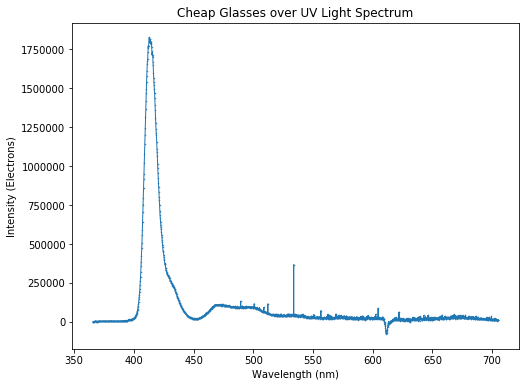

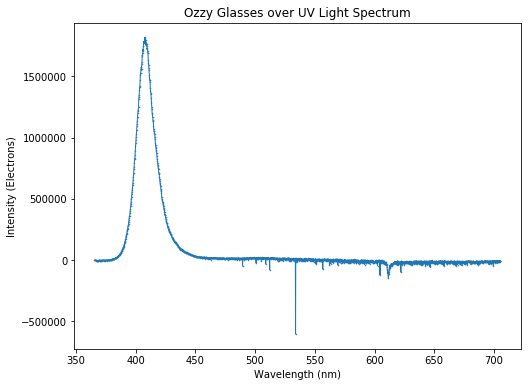

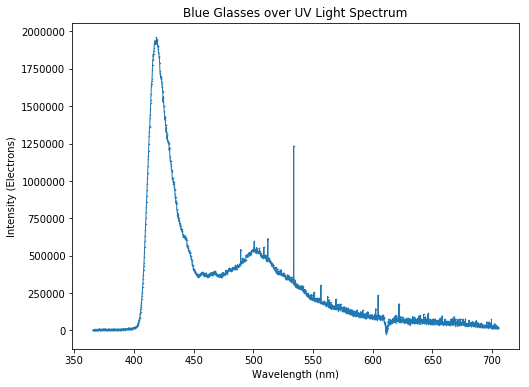

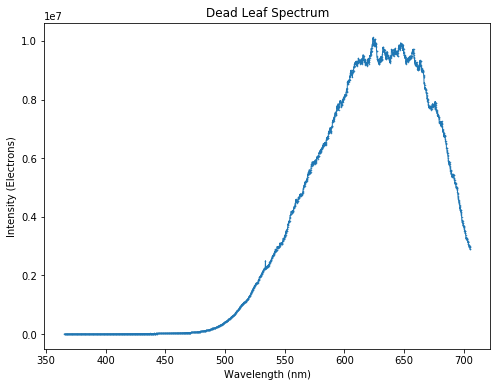

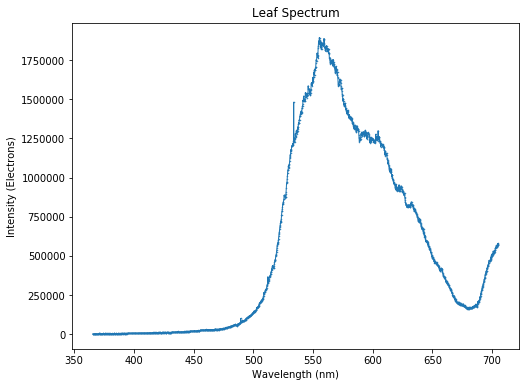

In [112]:
#Plot spectra shifted to wavelength with errorbars
#Incandescent
plt.figure(figsize=(8,6))
plt.errorbar(quad_fit, incandescent_corrected, xerr=None, yerr=incandescent_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Incandescent Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('incandescent.pdf')
plt.figure(figsize=(8,6))

#Fluorescent 
plt.errorbar(quad_fit, fluorescent_corrected, xerr=None, yerr=fluorescent_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Fluorescent Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('fluorescent.pdf')
plt.figure(figsize=(8,6))

#Hydrogen
plt.errorbar(quad_fit, hydrogen_corrected, xerr=None, yerr=hydrogen_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Hydrogen Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('hydrogen.pdf')
plt.figure(figsize=(8,6))

#Neon
plt.errorbar(quad_fit, neon_corrected, xerr=None, yerr=neon_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Neon Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('neon.pdf')
plt.figure(figsize=(8,6))

#Sun
plt.errorbar(quad_fit, sun_corrected, xerr=None, yerr=sun_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Sun Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('sun.pdf')

#Extra Spectra
plt.figure(figsize=(8,6))
plt.errorbar(quad_fit, uv_corrected, xerr=None, yerr=uv_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('UV Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('uv.pdf')

plt.figure(figsize=(8,6))
plt.errorbar(quad_fit, cheap_glasses_corrected, xerr=None, yerr=cheap_glasses_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Cheap Glasses over UV Light Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('cheap_glasses.pdf')

plt.figure(figsize=(8,6))
plt.errorbar(quad_fit, ozzy_uv_corrected, xerr=None, yerr=ozzy_uv_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Ozzy Glasses over UV Light Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('ozzy.pdf')

plt.figure(figsize=(8,6))
plt.errorbar(quad_fit, blue_glass_uv_corrected, xerr=None, yerr=blue_glass_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Blue Glasses over UV Light Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('blue_glasses.pdf')

plt.figure(figsize=(8,6))
plt.errorbar(quad_fit, dead_leaf_corrected, xerr=None, yerr=dead_leaf_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Dead Leaf Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('dead_leaf.pdf')

plt.figure(figsize=(8,6))
plt.errorbar(quad_fit, leaf_corrected, xerr=None, yerr=leaf_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Leaf Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.savefig('leaf.pdf')

In [118]:
print(np.argmax(uv_corrected), '+/-', uv_corrected_err[213])
print(np.argmax(ozzy_uv_corrected), '+/-', ozzy_uv_corrected_err[213])
print(np.argmax(cheap_glasses_corrected), '+/-', cheap_glasses_corrected_err[240])
print(np.argmax(blue_glass_uv_corrected), '+/-', blue_glass_corrected_err[272])

214 +/- 94.97902677242986
214 +/- 96.42689463811935
241 +/- 100.27902915170272
273 +/- 98.75271315783678


Text(0,0.5,'Intensity (Electrons)')

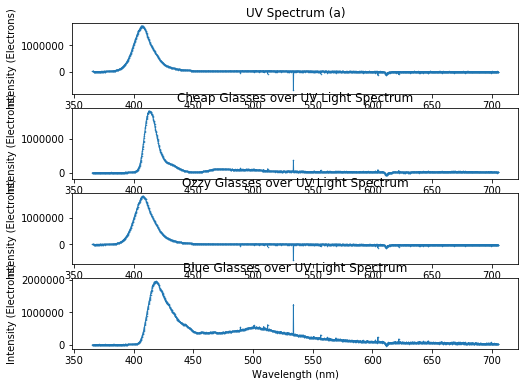

In [107]:
#UV Spectra
plt.figure(figsize=(8,6))
plt.subplot(4,1,1)
plt.errorbar(quad_fit, uv_corrected, xerr=None, yerr=uv_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('UV Spectrum (a)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.subplot(4,1,2)
plt.errorbar(quad_fit, cheap_glasses_corrected, xerr=None, yerr=cheap_glasses_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Cheap Glasses over UV Light Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.subplot(4,1,3)
plt.errorbar(quad_fit, ozzy_uv_corrected, xerr=None, yerr=ozzy_uv_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Ozzy Glasses over UV Light Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')
plt.subplot(4,1,4)
plt.errorbar(quad_fit, blue_glass_uv_corrected, xerr=None, yerr=blue_glass_corrected_err, marker='o', markersize=0.5, lw=1)
plt.title('Blue Glasses over UV Light Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electrons)')

In [30]:
#Load data for saturation level measurement
incandescent_saturation_filenames = sorted(glob.glob("/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Incandescent Increasing Integration Time/incandescent*.txt")) #Import all of the files with the beginning 'incandescent' and the end '.txt'

incand_sat_pixels=[] #Create empty list for pixel data to be appended to
incand_sat = [] #Create empty list for intensity data to be appended to
for filename in incandescent_saturation_filenames: #Iterate through all of the filenames
    incand_sat.append(np.genfromtxt(filename,float, skip_header=17, skip_footer=1, usecols=(1))) #Append the data in each of the files to appropriate list
    incand_sat_pixels.append(np.genfromtxt(filename,float, skip_header=17, skip_footer=1, usecols=(0)))
#Turn the lists of data into arrays
incand_sat_array = np.array([incand_sat]) 
incand_sat_pixel_array = np.array([incand_sat_pixels])

#Load darks for saturation level 
dark_saturation_filenames = sorted(glob.glob("/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Incandescent Increasing Integration Time/dark*.txt")) #Import all of the files with the beginning 'dark' and the end '.txt'

dark_sat_pixels=[] #Create empty list for pixel data to be appended to
dark_sat = [] #Create empty list for intensity data to be appended to
for filename in dark_saturation_filenames: #Iterate through all of the filenames
    dark_sat.append(np.genfromtxt(filename,float, skip_header=17, skip_footer=1, usecols=(1))) #Append the data in each of the files to appropriate list
    dark_sat_pixels.append(np.genfromtxt(filename,float, skip_header=17, skip_footer=1, usecols=(0)))
#Turn the lists of data into arrays
dark_sat_array = np.array([dark_sat]) 
dark_sat_pixel_array = np.array([dark_sat_pixels])

In [31]:
#Subtract darks from incandescent spectra
incand_sat_corrected = incand_sat_array - dark_sat_array

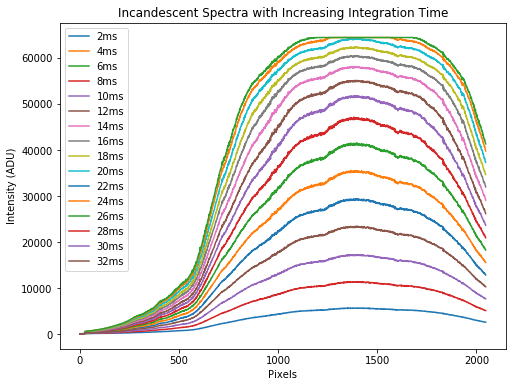

In [32]:
#Plot the spectra by increasing integration time
incand_sat_reshaped = incand_sat_corrected.reshape(16, -1)
plt.figure(figsize=(8,6))
plt.plot(incand_sat_reshaped[0], label=('2ms'))
plt.plot(incand_sat_reshaped[1], label=('4ms'))
plt.plot(incand_sat_reshaped[2], label=('6ms'))
plt.plot(incand_sat_reshaped[3], label=('8ms'))
plt.plot(incand_sat_reshaped[4], label=('10ms'))
plt.plot(incand_sat_reshaped[5], label=('12ms'))
plt.plot(incand_sat_reshaped[6], label=('14ms'))
plt.plot(incand_sat_reshaped[7], label=('16ms'))
plt.plot(incand_sat_reshaped[8], label=('18ms'))
plt.plot(incand_sat_reshaped[9], label=('20ms'))
plt.plot(incand_sat_reshaped[10], label=('22ms'))
plt.plot(incand_sat_reshaped[11], label=('24ms'))
plt.plot(incand_sat_reshaped[12], label=('26ms'))
plt.plot(incand_sat_reshaped[13], label=('28ms'))
plt.plot(incand_sat_reshaped[14], label=('30ms'))
plt.plot(incand_sat_reshaped[15], label=('32ms'))
plt.title('Incandescent Spectra with Increasing Integration Time')
plt.xlabel('Pixels')
plt.ylabel('Intensity (ADU)')
plt.legend()
plt.savefig('increasing_int_time.pdf')

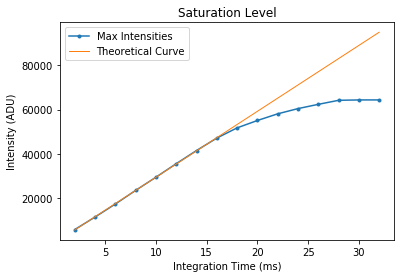

In [33]:
#Find the positions of the maxima of the spectra
max_incand = incand_sat_reshaped.argmax(axis=1)

#Find the intensitiy of each maxima
max_intensity = np.array((incand_sat_reshaped[0,1401], incand_sat_reshaped[1,1393], incand_sat_reshaped[2,1366], incand_sat_reshaped[3,1382],
                        incand_sat_reshaped[4,1382], incand_sat_reshaped[5,1389], incand_sat_reshaped[6,1389], incand_sat_reshaped[7,1366],
                        incand_sat_reshaped[8,1366], incand_sat_reshaped[9,1366], incand_sat_reshaped[10,1421], incand_sat_reshaped[11,1342], 
                        incand_sat_reshaped[12,1219], incand_sat_reshaped[13,1403], incand_sat_reshaped[14,1401], incand_sat_reshaped[15,1401]))
#Sort the intensity data
max_intensity_sorted = np.sort(max_intensity)
#Create an array for the x-axis
integration_time = np.arange(2,34,2)
#Fit the curve where it is definitely linear
p0_sat = p0(integration_time[0:8], max_intensity_sorted[0:8], 8)
p1_sat = p1(integration_time[0:8], max_intensity_sorted[0:8], 8, p0_sat)

#Plot the curves to show where the intensities depart from linearity - between 47 000 and 50 000 ADU
#Plot the data
plt.plot(integration_time,max_intensity_sorted, label='Max Intensities', marker='o', markersize=3)
#Plot the fit
plt.plot(integration_time, p0_sat*integration_time + p1_sat, label='Theoretical Curve', lw=1)
plt.title('Saturation Level')
plt.xlabel('Integration Time (ms)')
plt.ylabel('Intensity (ADU)')
plt.legend()
plt.savefig('saturation_level.pdf')

In [34]:
#Open the neon, flat, and dark telescope neon data
neon_telescope = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/neon_120s.fit')
dark1_day1 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/dark_120s-002F120s.fit')
dark2_day1 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/dark_120s-003F120s.fit')
dark3_day1 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/dark_120s-004F120s.fit')
flat1 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/flat_900s.fit')
flat2 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Flat-003F900s.fit')
flat3 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Flat-004F900s.fit')
flat4 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Flat-005F900s.fit')
flat5 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Flat-006F900s.fit')
flat6 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Flat-007F900s.fit')
flat7 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Flat-008F900s.fit')
dark_flat1 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-001D900s.fit')
dark_flat2 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-002D900s.fit')
dark_flat3 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-003D900s.fit')
dark_flat4 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-004D900s.fit')
dark_flat5 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-005D900s.fit')
dark_flat6 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-006D900s.fit')
dark_flat7 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-007D900s.fit')
dark_flat8 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-008D900s.fit')
dark_flat9 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-009D900s.fit')
dark_flat10 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-010D900s.fit')
dark_flat11 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/Flats/Dark-011D900s.fit')

In [35]:
#View the information in the neon data file 
neon_telescope.info()
neon_telescope['primary'].header

Filename: /Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/neon_120s.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   (765, 510)   int16 (rescales to uint16)   


SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                  765 /fastest changing axis                           
NAXIS2  =                  510 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
INSTRUME= 'ST-7    ' /          instrument or camera used                       
DATE-OBS= '2018-11-21T00:37:00' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   120.00000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.417621345447458 /CCD temperature at start of exposure in C       
XPIXSZ  =   9.00000000000000

In [36]:
#Multiply the data by BSCALE and add BZERO - these are the same for every file, I checked
neon_telescope_data = (neon_telescope['primary'].data*1.0000000000000000) + 32768.000000000000
dark1_day1_data = (dark1_day1['primary'].data*1.0000000000000000) + 32768.000000000000
dark2_day1_data = (dark2_day1['primary'].data*1.0000000000000000) + 32768.000000000000
dark3_day1_data = (dark3_day1['primary'].data*1.0000000000000000) + 32768.000000000000
flat1_data = (flat1['primary'].data*1.0000000000000000) + 32768.000000000000
flat2_data = (flat2['primary'].data*1.0000000000000000) + 32768.000000000000
flat3_data = (flat3['primary'].data*1.0000000000000000) + 32768.000000000000
flat4_data = (flat4['primary'].data*1.0000000000000000) + 32768.000000000000
flat5_data = (flat5['primary'].data*1.0000000000000000) + 32768.000000000000
flat6_data = (flat6['primary'].data*1.0000000000000000) + 32768.000000000000
flat7_data = (flat7['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat1_data = (dark_flat1['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat2_data = (dark_flat2['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat3_data = (dark_flat3['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat4_data = (dark_flat4['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat5_data = (dark_flat5['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat6_data = (dark_flat6['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat7_data = (dark_flat7['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat8_data = (dark_flat8['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat9_data = (dark_flat9['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat10_data = (dark_flat10['primary'].data*1.0000000000000000) + 32768.000000000000
dark_flat11_data = (dark_flat11['primary'].data*1.0000000000000000) + 32768.000000000000

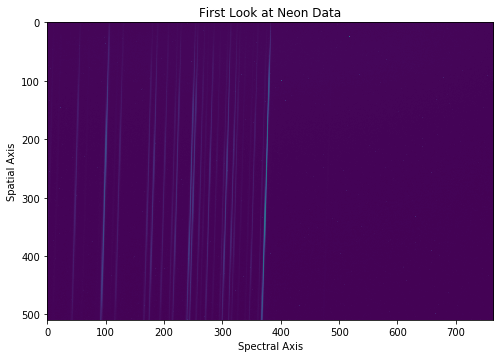

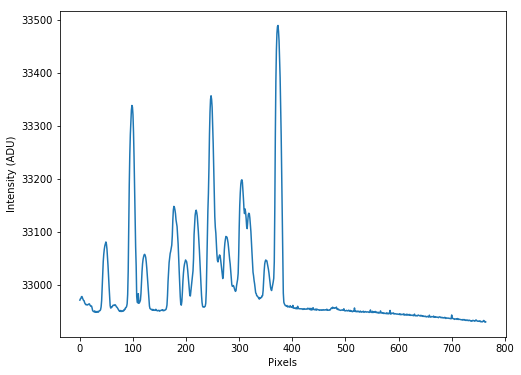

In [37]:
#Show neon data image
plt.figure(figsize=(8,6))
plt.imshow(neon_telescope_data)
plt.title('First Look at Neon Data')
plt.xlabel('Spectral Axis')
plt.ylabel('Spatial Axis')
plt.savefig('neon_tele_first.pdf')
#Show spectrum by taking the mean
plt.figure(figsize=(8,6))
neon_uncorrected_mean = np.mean(neon_telescope_data, axis=0)
plt.plot(neon_uncorrected_mean)
plt.xlabel('Pixels')
plt.ylabel('Intensity (ADU)')
plt.savefig('neon_spec_tele_first.pdf')

Text(0,0.5,'Intensity (ADU)')

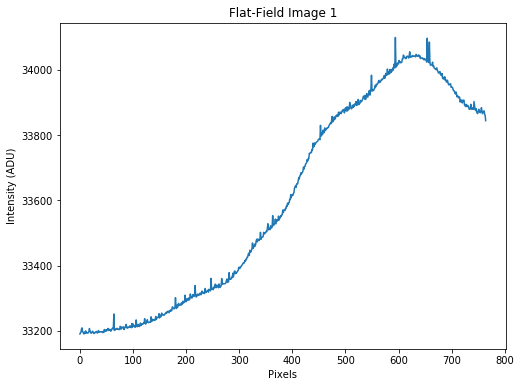

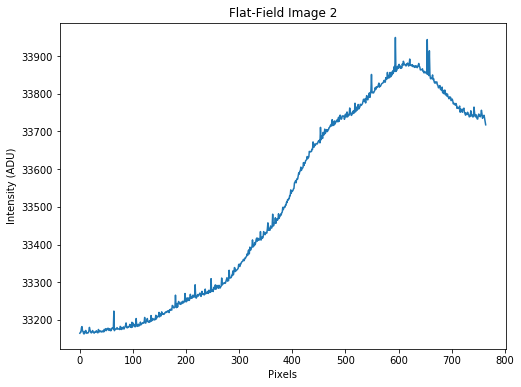

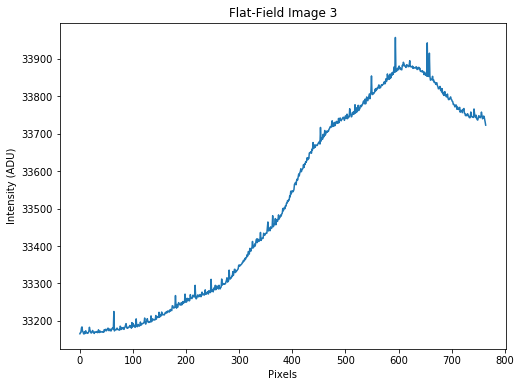

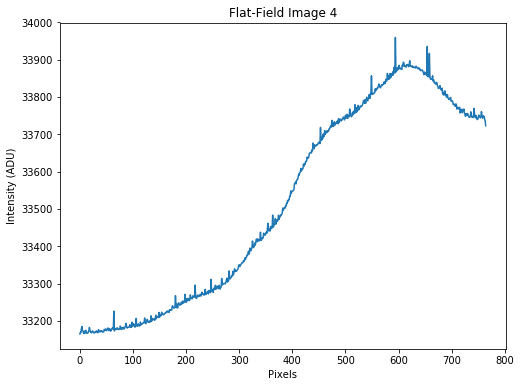

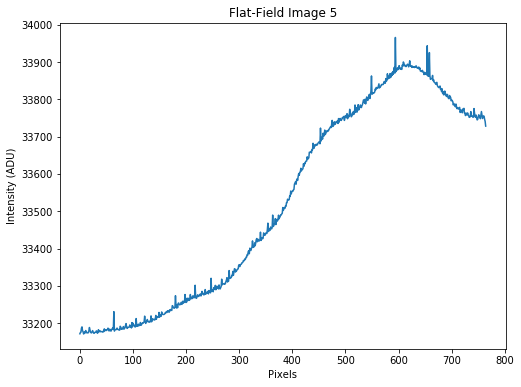

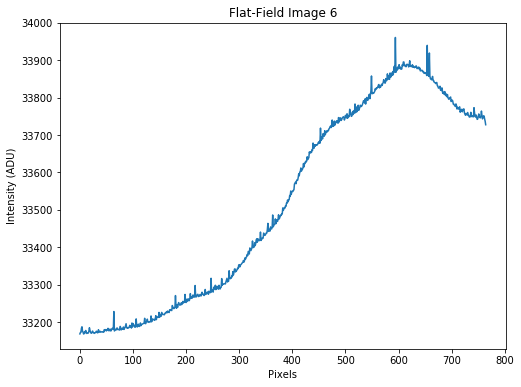

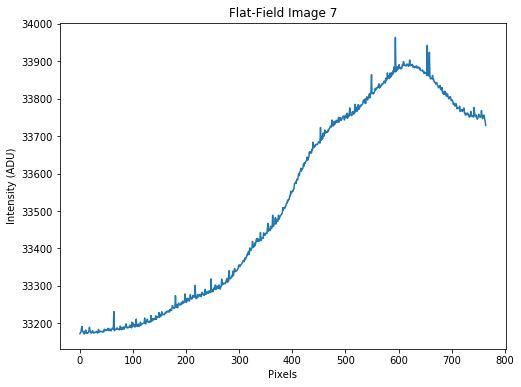

In [38]:
#To see if the flats are truly flat, plot the flats over a blackbody curve that is the same temperature of the lamp used to take the flats
#Take the mean across the spectral axis
flat1_avg = np.mean(np.flip(flat1_data, axis=1), axis=0)
flat2_avg = np.mean(np.flip(flat2_data, axis=1), axis=0)
flat3_avg = np.mean(np.flip(flat3_data, axis=1), axis=0)
flat4_avg = np.mean(np.flip(flat4_data, axis=1), axis=0)
flat5_avg = np.mean(np.flip(flat5_data, axis=1), axis=0)
flat6_avg = np.mean(np.flip(flat6_data, axis=1), axis=0)
flat7_avg = np.mean(np.flip(flat7_data, axis=1), axis=0)

#Plot the flats
plt.figure(figsize=(8,6))
plt.plot(flat1_avg)
plt.title('Flat-Field Image 1')
plt.xlabel('Pixels')
plt.ylabel('Intensity (ADU)')
plt.savefig('flat1.pdf')
plt.figure(figsize=(8,6))
plt.plot(flat2_avg)
plt.title('Flat-Field Image 2')
plt.xlabel('Pixels')
plt.ylabel('Intensity (ADU)')
plt.figure(figsize=(8,6))
plt.plot(flat3_avg)
plt.title('Flat-Field Image 3')
plt.xlabel('Pixels')
plt.ylabel('Intensity (ADU)')
plt.figure(figsize=(8,6))
plt.plot(flat4_avg)
plt.title('Flat-Field Image 4')
plt.xlabel('Pixels')
plt.ylabel('Intensity (ADU)')
plt.figure(figsize=(8,6))
plt.plot(flat5_avg)
plt.title('Flat-Field Image 5')
plt.xlabel('Pixels')
plt.ylabel('Intensity (ADU)')
plt.figure(figsize=(8,6))
plt.plot(flat6_avg)
plt.title('Flat-Field Image 6')
plt.xlabel('Pixels')
plt.ylabel('Intensity (ADU)')
plt.figure(figsize=(8,6))
plt.plot(flat7_avg)
plt.title('Flat-Field Image 7')
plt.xlabel('Pixels')
plt.ylabel('Intensity (ADU)')

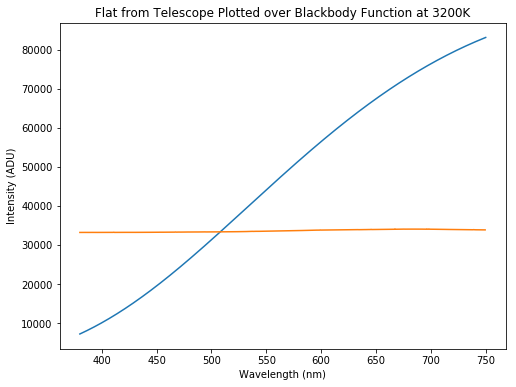

In [39]:
#All flats look pretty similar, so choose one to test (I chose the first one)
#Define constants for the Planck function - constants taken from Carroll and Ostlie
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

#Define the Planck function (Carroll and Ostlie)
def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

#Make an array for wavelengths in metres
wavelengths = np.arange(3.8e-7, 7.5e-7, (7.5e-7 - 3.8e-7)/510)

#Calculate the Planck function at the temperature of the lamp, which is given in the lab manual to be 3200K
intensity = planck(wavelengths, 3200.)

#Plot the flat over the blackbody curve - because the flat looks flat, we know it is truly a flat
plt.figure(figsize=(8,6))
#Plot the blackbody curve
plt.plot(wavelengths*1e9, intensity/1.5e7)
#Plot the flat
plt.plot(np.arange(380,750, (750-380)/len(flat1_avg)), flat1_avg)
plt.title('Flat from Telescope Plotted over Blackbody Function at 3200K')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (ADU)')
plt.savefig('flat_check.pdf')

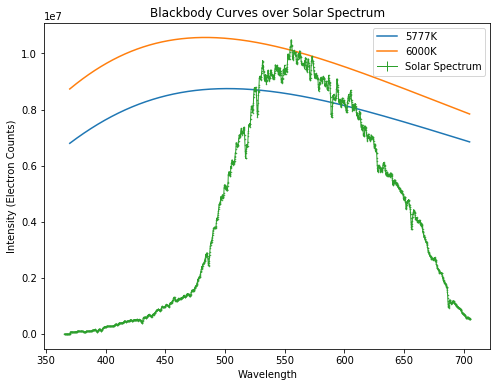

In [95]:
#Blackbody comparison of the solar spectrum
#Expected temperature of the Sun, 5777K (Carroll and Ostlie)
wavelength_sun = np.arange(3.7e-7, 7.05e-7, (7.05e-7 - 3.7e-7)/2048)
sun_intensity = planck(wavelength_sun, 5777.)

#Trial temperature 
trial_intensity = planck(wavelength_sun, 6000.)

#Plots
plt.figure(figsize=(8,6))
plt.plot(wavelength_sun*1e9, sun_intensity/3e6, label='5777K')
plt.plot(wavelength_sun*1e9, trial_intensity/3e6, label='6000K')
plt.errorbar(quad_fit, sun_corrected, xerr=None, yerr=sun_corrected_err, marker='o', markersize=0.5, lw=1, label='Solar Spectrum')
plt.title('Blackbody Curves over Solar Spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Intensity (Electron Counts)')
plt.legend()
plt.savefig('sun_blackbody.pdf')

In [40]:
#Load telescope data of sources and corresponding darks
vega = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/vega_120s.fit')
scheat = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/scheat_good_120s.fit')
enif = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/enif_120s.fit')
deneb = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/deneb_120s.fit')
albireo = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/albireo_120s.fit')
mars = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/GroupA/mars_better_120s.fit')
dark1_day2 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/darksNov22/dark_-012F120s.fit')
dark2_day2 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/darksNov22/dark_-013F120s.fit')
dark3_day2 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/darksNov22/dark_-014F120s.fit')
dark4_day2 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/darksNov22/dark_-015F120s.fit')
dark5_day2 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/darksNov22/dark_-016F120s.fit')
dark6_day2 = ft.open('/Users/chloecheng/Documents/School/Undergrad/Third Year/Year/AST326/Lab 3/darksNov22/dark_-017F120s.fit')

In [41]:
#Add BSCALE and multiply BZERO to all of the data
vega_data = (vega['primary'].data*1.0000000000000000) + 32768.000000000000
scheat_data = (scheat['primary'].data*1.0000000000000000) + 32768.000000000000
enif_data = (enif['primary'].data*1.0000000000000000) + 32768.000000000000
deneb_data = (deneb['primary'].data*1.0000000000000000) + 32768.000000000000
albireo_data = (albireo['primary'].data*1.0000000000000000) + 32768.000000000000
mars_data = (mars['primary'].data*1.0000000000000000) + 32768.000000000000
dark1_day2_data = (dark1_day2['primary'].data*1.0000000000000000) + 32768.000000000000
dark2_day2_data = (dark2_day2['primary'].data*1.0000000000000000) + 32768.000000000000
dark3_day2_data = (dark3_day2['primary'].data*1.0000000000000000) + 32768.000000000000
dark4_day2_data = (dark4_day2['primary'].data*1.0000000000000000) + 32768.000000000000
dark5_day2_data = (dark5_day2['primary'].data*1.0000000000000000) + 32768.000000000000
dark6_day2_data = (dark6_day2['primary'].data*1.0000000000000000) + 32768.000000000000

In [42]:
#Flip all data
neon_dat = np.flip(neon_telescope_data, axis=1)
vega_dat = np.flip(vega_data, axis=1)
scheat_dat = np.flip(scheat_data, axis=1)
enif_dat = np.flip(enif_data, axis=1)
deneb_dat = np.flip(deneb_data, axis=1)
albireo_dat = np.flip(albireo_data, axis=1)
mars_dat = np.flip(mars_data, axis=1)
neon_telescope_dat = np.flip(neon_telescope_data, axis=1)
dark1_day1_dat = np.flip(dark1_day1_data, axis=1)
dark2_day1_dat = np.flip(dark2_day1_data, axis=1)
dark3_day1_dat = np.flip(dark3_day1_data, axis=1)
flat1_dat = np.flip(flat1_data, axis=1)
flat2_dat = np.flip(flat2_data, axis=1)
flat3_dat = np.flip(flat3_data, axis=1)
flat4_dat = np.flip(flat4_data, axis=1)
flat5_dat = np.flip(flat5_data, axis=1)
flat6_dat = np.flip(flat6_data, axis=1)
flat7_dat = np.flip(flat7_data, axis=1)
dark_flat1_dat = np.flip(dark_flat1_data, axis=1)
dark_flat2_dat = np.flip(dark_flat2_data, axis=1)
dark_flat3_dat = np.flip(dark_flat3_data, axis=1)
dark_flat4_dat = np.flip(dark_flat4_data, axis=1)
dark_flat5_dat = np.flip(dark_flat5_data, axis=1)
dark_flat6_dat = np.flip(dark_flat6_data, axis=1)
dark_flat7_dat = np.flip(dark_flat7_data, axis=1)
dark_flat8_dat = np.flip(dark_flat8_data, axis=1)
dark_flat9_dat = np.flip(dark_flat9_data, axis=1)
dark_flat10_dat = np.flip(dark_flat10_data, axis=1)
dark_flat11_dat = np.flip(dark_flat11_data, axis=1)
dark1_day2_dat = np.flip(dark1_day2_data, axis=1)
dark2_day2_dat = np.flip(dark2_day2_data, axis=1)
dark3_day2_dat = np.flip(dark3_day2_data, axis=1)
dark4_day2_dat = np.flip(dark4_day2_data, axis=1)
dark5_day2_dat = np.flip(dark5_day2_data, axis=1)
dark6_day2_dat = np.flip(dark6_day2_data, axis=1)

In [43]:
#Calculate errors in the data (Poissonian error)
neon_data_err = np.sqrt(neon_dat)
vega_data_err = np.sqrt(vega_dat)
scheat_data_err = np.sqrt(scheat_dat)
enif_data_err = np.sqrt(enif_dat)
deneb_data_err = np.sqrt(deneb_dat)
albireo_data_err = np.sqrt(albireo_dat)
mars_data_err = np.sqrt(mars_dat)

In [44]:
#Average the correction spectra
darks_day1_avg = (dark1_day1_dat + dark2_day1_dat + dark3_day1_dat)/3
flats_avg = ((flat1_dat+flat2_dat+flat3_dat+flat4_dat+flat5_dat+flat6_dat+flat7_dat)*(120/900))/7
dark_flat_avg = ((dark_flat1_dat+dark_flat2_dat+dark_flat3_dat+dark_flat4_dat+dark_flat5_dat+dark_flat6_dat+dark_flat7_dat+dark_flat8_dat+dark_flat9_dat+dark_flat10_dat+dark_flat11_dat)*(120/900))/11
darks_day2_avg = (dark1_day2_dat+dark2_day2_dat+dark3_day2_dat+dark4_day2_dat+dark5_day2_dat+dark6_day2_dat)/6

#Errors in correction spectra
darks_day1_err = np.std(darks_day1_avg)
flats_err = np.std(flats_avg)
dark_flat_err = np.std(dark_flat_avg)
darks_day2_err = np.std(darks_day2_avg)

In [45]:
#Correct all the data
neon_telescope_corrected = (neon_telescope_dat - darks_day1_avg)/(flats_avg - dark_flat_avg)
vega_corrected = (vega_dat - darks_day2_avg)/(flats_avg - dark_flat_avg)
scheat_corrected = (scheat_dat - darks_day2_avg)/(flats_avg - dark_flat_avg)
enif_corrected = (enif_dat - darks_day2_avg)/(flats_avg - dark_flat_avg)
deneb_corrected = (deneb_dat - darks_day2_avg)/(flats_avg - dark_flat_avg)
albireo_corrected = (albireo_dat - darks_day2_avg)/(flats_avg - dark_flat_avg)
mars_corrected = (mars_dat - darks_day2_avg)/(flats_avg - dark_flat_avg)

In [46]:
#Errors for corrected data 
#Define function for quadrature
def telescope_correct_err(pixel, dark, flat, pixel_err, dark_err, flat_err, correct, dark_flat, dark_flat_err):
    error = correct*np.sqrt((np.sqrt(pixel_err**2 + dark_err**2)/(pixel - dark))**2 + (np.sqrt(flat_err**2 + dark_flat_err**2)/(flat - dark_flat))**2)
    return error

neon_corrected_err = telescope_correct_err(neon_dat, darks_day1_avg, flats_avg, neon_data_err, darks_day1_err, flats_err, neon_telescope_corrected, dark_flat_avg, dark_flat_err)
vega_corrected_err = telescope_correct_err(vega_dat, darks_day2_avg, flats_avg, vega_data_err, darks_day1_err, flats_err, vega_corrected, dark_flat_avg, dark_flat_err)
scheat_corrected_err = telescope_correct_err(scheat_dat, darks_day2_avg, flats_avg, scheat_data_err, darks_day1_err, flats_err, scheat_corrected, dark_flat_avg, dark_flat_err)
enif_corrected_err = telescope_correct_err(enif_dat, darks_day2_avg, flats_avg, enif_data_err, darks_day1_err, flats_err, enif_corrected, dark_flat_avg, dark_flat_err)
deneb_corrected_err = telescope_correct_err(deneb_dat, darks_day2_avg, flats_avg, deneb_data_err, darks_day1_err, flats_err, deneb_corrected, dark_flat_avg, dark_flat_err)
albireo_corrected_err = telescope_correct_err(albireo_dat, darks_day2_avg, flats_avg, albireo_data_err, darks_day1_err, flats_err, albireo_corrected, dark_flat_avg, dark_flat_err)
mars_corrected_err = telescope_correct_err(mars_dat, darks_day2_avg, flats_avg, mars_data_err, darks_day1_err, flats_err, mars_corrected, dark_flat_avg, dark_flat_err)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


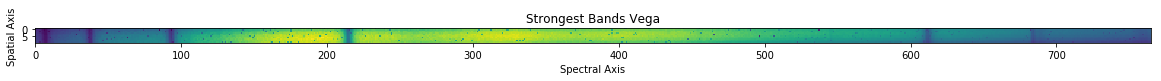

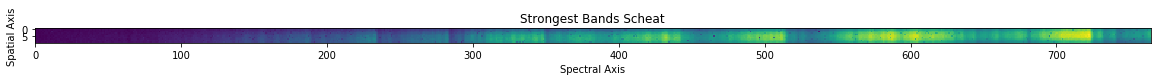

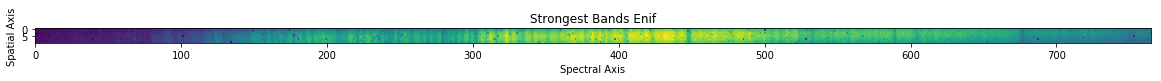

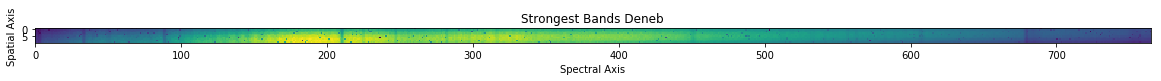

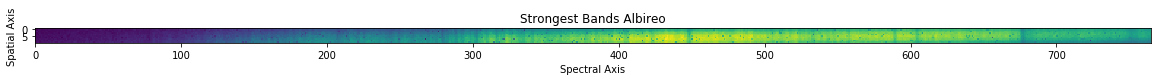

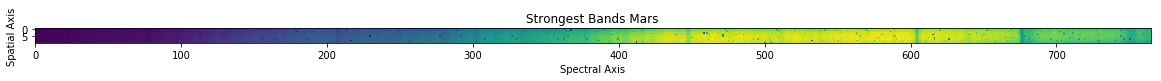

In [47]:
#Find strongest intensities of each spectrum and do the wavelength solution for each source
plt.figure(figsize=(20,20))
plt.imshow(vega_corrected[378:388])
plt.title('Strongest Bands Vega')
plt.xlabel('Spectral Axis')
plt.ylabel('Spatial Axis')
plt.savefig('strong_vega.pdf')
plt.figure(figsize=(20,20))
plt.imshow(scheat_corrected[377:387])
plt.title('Strongest Bands Scheat')
plt.xlabel('Spectral Axis')
plt.ylabel('Spatial Axis')
plt.savefig('strong_scheat.pdf')
plt.figure(figsize=(20,20))
plt.imshow(enif_corrected[368:378])
plt.title('Strongest Bands Enif')
plt.xlabel('Spectral Axis')
plt.ylabel('Spatial Axis')
plt.savefig('strong_enif.pdf')
plt.figure(figsize=(20,20))
plt.imshow(deneb_corrected[299:309])
plt.title('Strongest Bands Deneb')
plt.xlabel('Spectral Axis')
plt.ylabel('Spatial Axis')
plt.savefig('strong_deneb.pdf')
plt.figure(figsize=(20,20))
plt.imshow(albireo_corrected[334:344])
plt.title('Strongest Bands Albireo')
plt.xlabel('Spectral Axis')
plt.ylabel('Spatial Axis')
plt.savefig('strong_albireo.pdf')
plt.figure(figsize=(20,20))
plt.imshow(mars_corrected[397:407])
plt.title('Strongest Bands Mars')
plt.xlabel('Spectral Axis')
plt.ylabel('Spatial Axis')
plt.savefig('strong_mars.pdf')

#Define means for the strongest intensities of each spectrum
vega_mean = np.mean(vega_corrected[378:388], axis=0)
scheat_mean = np.mean(scheat_corrected[377:387], axis=0)
enif_mean = np.mean(enif_corrected[368:378], axis=0)
deneb_mean = np.mean(deneb_corrected[299:309], axis=0)
albireo_mean = np.mean(albireo_corrected[334:344], axis=0)
mars_mean = np.mean(mars_corrected[397:407], axis=0)

#Errors in these means, using standard error of mean
vega_err = np.std(vega_corrected[378:388], axis=0)/np.sqrt(len(vega_corrected))
scheat_err = np.std(scheat_corrected[377:387], axis=0)/np.sqrt(len(scheat_corrected))
enif_err = np.std(enif_corrected[368:378], axis=0)/np.sqrt(len(enif_corrected))
deneb_err = np.std(deneb_corrected[299:309], axis=0)/np.sqrt(len(deneb_corrected))
albireo_err = np.std(albireo_corrected[334:344], axis=0)/np.sqrt(len(albireo_corrected))
mars_err = np.std(mars_corrected[397:407], axis=0)/np.sqrt(len(mars_corrected))

[393 450 461 490 517 521 546 586 669 718]


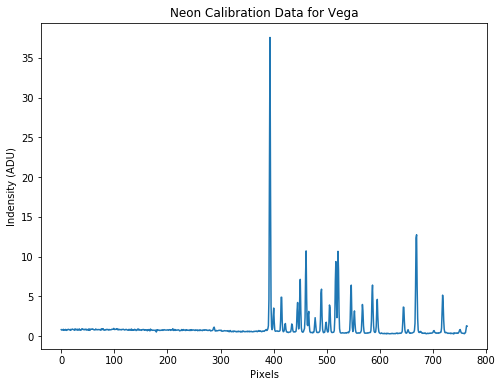

In [48]:
#Wavelength solution for Vega
#Take the mean of the neon spectra across the intensities chosen for Vega and plot the spectrum
neon_vega = np.mean(neon_telescope_corrected[378:388], axis=0)
plt.figure(figsize=(8,6))
plt.plot(neon_vega)
plt.title('Neon Calibration Data for Vega')
plt.xlabel('Pixels')
plt.ylabel('Indensity (ADU)')
plt.savefig('neon_vega.pdf')

#Find the peaks using Andy's telescope peak finding function:
def centfindert(x, threshold,threshold2): #Choose thresholds
    pixels = np.arange(0,len(x))
    intensity = x
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
    peaksx = np.array(peaksx)
    return peaksx

#Find the peaks of neon for Vega
neon_vega_centroids = centfindert(neon_vega, 5, 5)
print(neon_vega_centroids)

The measurement error for the wavlength solution for Vega is 0.7781807558337142 , the uncertinty in the slope is 0.0029474213765881595 , and the uncertainty in the y-intercept is 1.6016454277431744 .


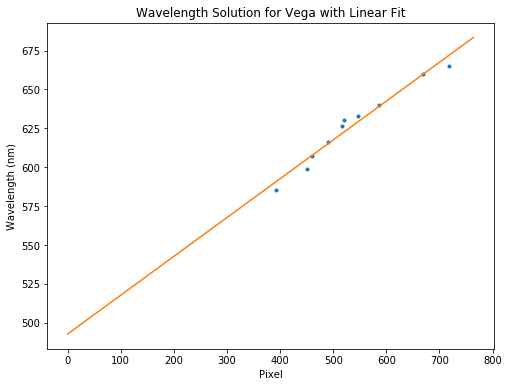

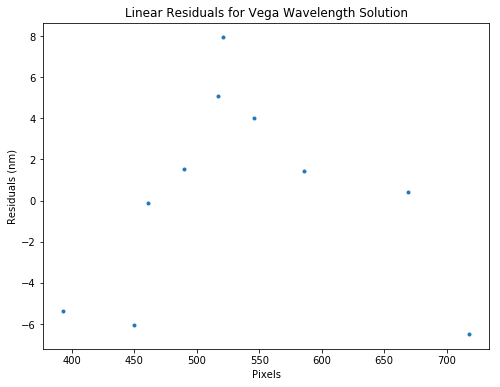

In [49]:
#Vega continued
#Make array of known neon wavelengths corresponding to centroids
known_neon_vega = np.array((585.24879, 598.79074, 607.43377, 616.35939, 626.6495, 630.47889, 632.81646, 640.2248, 659.89529, 665.20927))

#Plot linear fit
#Calculate initial conditions
p0_vega = p0(neon_vega_centroids, known_neon_vega, 10) 
p1_vega = p1(neon_vega_centroids, known_neon_vega, 10, p0_vega) 

#Plot the wavelength solution with the linear fit
x_telescope = np.arange(0, 765) #Make array for x-axis that is the length of the domain
plt.figure(figsize=(8,6))
#Plot the data
plt.plot(neon_vega_centroids, known_neon_vega, ls = '', marker='o', markersize=3)
#Plot the fit
plt.plot(x_telescope, model_linear(x_telescope, p0_vega, p1_vega))
plt.xlabel('Pixel')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Solution for Vega with Linear Fit')
plt.savefig('linfit_vega.pdf')

#Calculate residuals from the linear fit
vega_fit = model_linear(x_telescope, p0_vega, p1_vega)
vega_residuals = []
for i in range(0,10): #Subtract the linear fit from the data points
    vega_residuals.append(-vega_fit[np.int(neon_vega_centroids[i])-1] + known_neon_vega[i])
    
#Plot the linear residuals - since they are random, don't need to do higher-order polynomial fit
plt.figure(figsize=(8,6))
plt.plot(neon_vega_centroids, vega_residuals, ls='', marker='o', markersize=3)
plt.title('Linear Residuals for Vega Wavelength Solution')
plt.xlabel('Pixels')
plt.ylabel('Residuals (nm)')
plt.savefig('residuals_vega.pdf')

#Calculate errors in parameters for linear fit
vega_mes_err = sigma_squared(vega_residuals, 10) 
vega_slope_err = sigma_m(neon_vega_centroids, 10, vega_mes_err) 
vega_intercept_err = sigma_c(neon_vega_centroids, 10, vega_mes_err) 
print("The measurement error for the wavlength solution for Vega is", vega_mes_err, ", the uncertinty in the slope is", vega_slope_err, ", and the uncertainty in the y-intercept is", vega_intercept_err, ".")

[393 450 461 490 517 521 546 586 669 718]


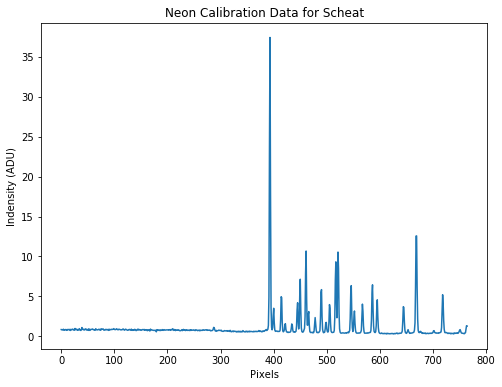

In [50]:
#Wavelength solution for Scheat
neon_scheat = np.mean(neon_telescope_corrected[377:387], axis=0)
plt.figure(figsize=(8,6))
plt.plot(neon_scheat)
plt.title('Neon Calibration Data for Scheat')
plt.xlabel('Pixels')
plt.ylabel('Indensity (ADU)')
plt.savefig('neon_scheat.pdf')

#Andy's telescope peak finding function
#Peak calculator using the help
def centfindert(x, threshold,threshold2):
    pixels = np.arange(0,len(x))
    intensity = x
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
    peaksx = np.array(peaksx)
    return peaksx

#Calculate peaks for Scheat
neon_scheat_centroids = centfindert(neon_scheat, 5, 5)
print(neon_scheat_centroids)

The measurement error for the wavlength solution for Scheat is 0.7781807558337142 , the uncertinty in the slope is 0.0029474213765881595 , and the uncertainty in the y-intercept is 1.6016454277431744 .


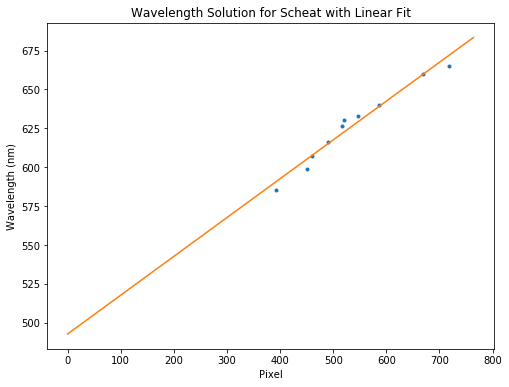

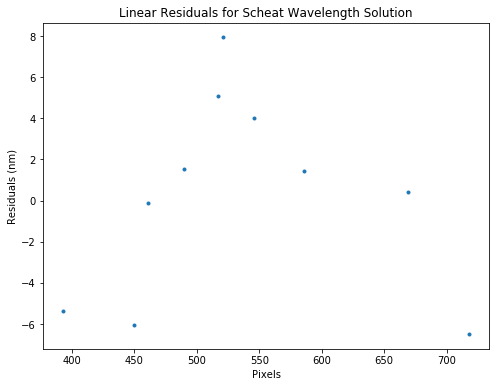

In [51]:
#Scheat continued
#Make array of known neon wavelengths corresponding to centroids
known_neon_scheat = np.array((585.24879, 598.79074, 607.43377, 616.35939, 626.6495, 630.47889, 632.81646, 640.2248, 659.89529, 665.20927))

#Plot linear fit
#Calculate initial conditions
p0_scheat = p0(neon_scheat_centroids, known_neon_scheat, 10) 
p1_scheat = p1(neon_scheat_centroids, known_neon_scheat, 10, p0_scheat)

#Plot the wavelength solution with the linear fit
x_telescope = np.arange(0, 765) #Make array for x-axis that is the length of the domain
plt.figure(figsize=(8,6))
plt.plot(neon_scheat_centroids, known_neon_scheat, ls = '', marker='o', markersize=3)
plt.plot(x_telescope, model_linear(x_telescope, p0_scheat, p1_scheat))
plt.xlabel('Pixel')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Solution for Scheat with Linear Fit')
plt.savefig('scheat_fit.pdf')

#Residuals from the linear fit
scheat_fit = model_linear(x_telescope, p0_scheat, p1_scheat)
scheat_residuals = []
for i in range(0,10): 
    scheat_residuals.append(-scheat_fit[np.int(neon_scheat_centroids[i])-1] + known_neon_scheat[i])
    
#Plot linear residuals
plt.figure(figsize=(8,6))
plt.plot(neon_scheat_centroids, scheat_residuals, ls='', marker='o', markersize=3)
plt.title('Linear Residuals for Scheat Wavelength Solution')
plt.xlabel('Pixels')
plt.ylabel('Residuals (nm)')
plt.savefig('scheat_residuals.pdf')

#Calculate errors in parameters for linear fit
scheat_mes_err = sigma_squared(scheat_residuals, 10) #fill in n
scheat_slope_err = sigma_m(neon_scheat_centroids, 10, scheat_mes_err) #fill in n
scheat_intercept_err = sigma_c(neon_scheat_centroids, 10, scheat_mes_err) #fill in n
print("The measurement error for the wavlength solution for Scheat is", scheat_mes_err, ", the uncertinty in the slope is", scheat_slope_err, ", and the uncertainty in the y-intercept is", scheat_intercept_err, ".")

[393 414 450 460 489 517 521 545 585 668]


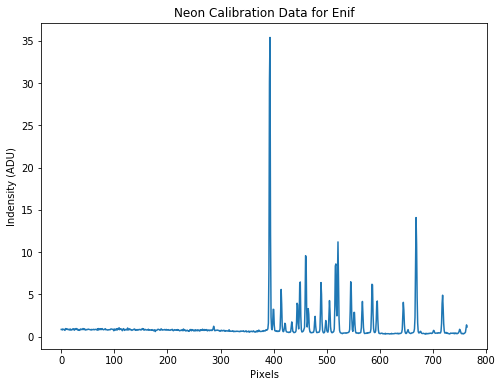

In [52]:
#Wavelength solution for Enif
neon_enif = np.mean(neon_telescope_corrected[368:378], axis=0)
plt.figure(figsize=(8,6))
plt.plot(neon_enif)
plt.title('Neon Calibration Data for Enif')
plt.xlabel('Pixels')
plt.ylabel('Indensity (ADU)')
plt.savefig('neon_enif.pdf')

#Find the centroids 
#Andy's telescope peak finding function
#Peak calculator using the help
def centfindert(x, threshold,threshold2):
    pixels = np.arange(0,len(x))
    intensity = x
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
    peaksx = np.array(peaksx)
    return peaksx

neon_enif_centroids = centfindert(neon_enif,5,5)
print(neon_enif_centroids)

0.2765680656730015 477.8818927876727
The measurement error for the wavlength solution for Enif is 0.9561236868755723 , the uncertinty in the slope is 0.003956026391285712 , and the uncertainty in the y-intercept is 2.018453677341927 .


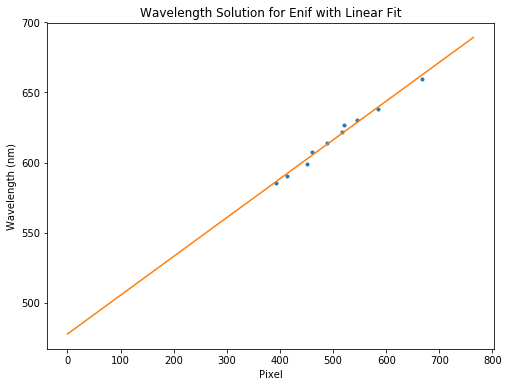

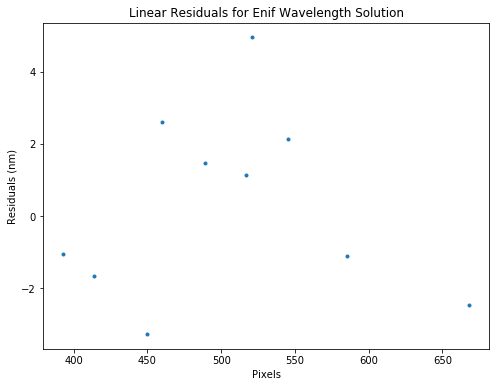

In [53]:
#Enif continued
#Make array of known neon wavelengths corresponding to centroids
known_neon_enif = np.array((585.24879, 590.444585, 598.79074, 607.43377, 614.30626, 621.72812, 626.6495, 630.47889, 638.29917, 659.89529))

#Plot linear fit
#Calculate initial conditions
p0_enif = p0(neon_enif_centroids, known_neon_enif, 10) 
p1_enif = p1(neon_enif_centroids, known_neon_enif, 10, p0_enif) 
print(p0_enif, p1_enif)

#Plot the wavelength solution with the linear fit
x_telescope = np.arange(0, 765) #Make array for x-axis that is the length of the domain
plt.figure(figsize=(8,6))
plt.plot(neon_enif_centroids, known_neon_enif, ls = '', marker='o', markersize=3)
plt.plot(x_telescope, model_linear(x_telescope, p0_enif, p1_enif))
plt.xlabel('Pixel')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Solution for Enif with Linear Fit')
plt.savefig('enif_fit.pdf')

#Residuals from the linear fit
enif_fit = model_linear(x_telescope, p0_enif, p1_enif)
enif_residuals = []
for i in range(0,10): 
    enif_residuals.append(-enif_fit[np.int(neon_enif_centroids[i])-1] + known_neon_enif[i])
    
#Plot linear residuals
plt.figure(figsize=(8,6))
plt.plot(neon_enif_centroids, enif_residuals, ls='', marker='o', markersize=3)
plt.title('Linear Residuals for Enif Wavelength Solution')
plt.xlabel('Pixels')
plt.ylabel('Residuals (nm)')
plt.savefig('enif_residuals.pdf')

#Calculate errors in parameters for linear fit
enif_mes_err = sigma_squared(enif_residuals, 10) 
enif_slope_err = sigma_m(neon_enif_centroids, 10, enif_mes_err) 
enif_intercept_err = sigma_c(neon_enif_centroids, 10, enif_mes_err) 
print("The measurement error for the wavlength solution for Enif is", enif_mes_err, ", the uncertinty in the slope is", enif_slope_err, ", and the uncertainty in the y-intercept is", enif_intercept_err, ".")

[391 412 447 458 487 514 519 543 583 666 716]


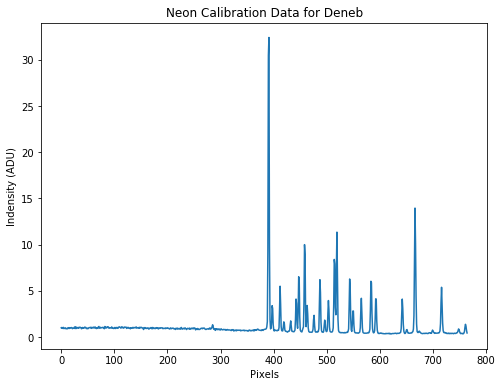

In [54]:
#Wavelength solution for Deneb
neon_deneb = np.mean(neon_telescope_corrected[299:309], axis=0)
plt.figure(figsize=(8,6))
plt.plot(neon_deneb)
plt.title('Neon Calibration Data for Deneb')
plt.xlabel('Pixels')
plt.ylabel('Indensity (ADU)')
plt.savefig('neon_deneb.pdf')

#Find the centroids 
#Andy's telescope peak finding function
#Peak calculator using the help
def centfindert(x, threshold,threshold2):
    pixels = np.arange(0,len(x))
    intensity = x
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
    peaksx = np.array(peaksx)
    return peaksx

neon_deneb_centroids = centfindert(neon_deneb,5,5)
print(neon_deneb_centroids)

The measurement error for the wavlength solution for Deneb is 0.8304670209499756 , the uncertinty in the slope is 0.0028421171788750544 , and the uncertainty in the y-intercept is 1.5072904533836886 .


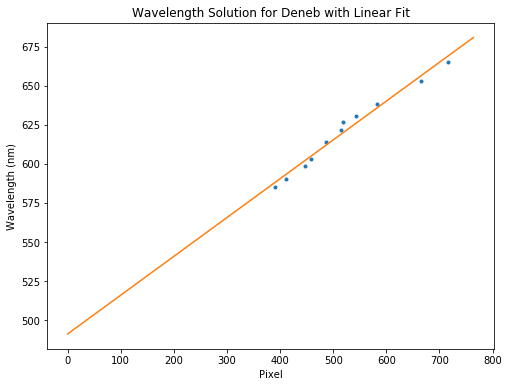

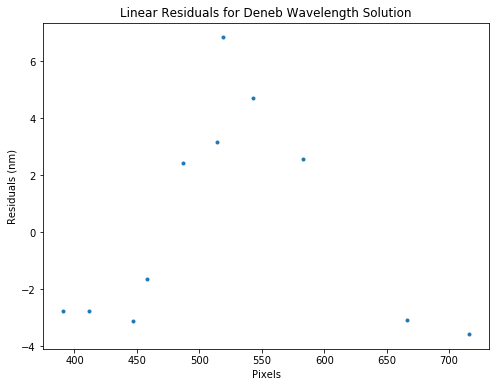

In [55]:
#Deneb continued
#Make array of known neon wavelengths corresponding to centroids
known_neon_deneb = np.array((585.24879, 590.444585, 598.79074, 602.99969, 614.30626, 621.72812, 626.6495, 630.47889, 638.29917, 653.28822, 665.20927))

#Plot linear fit
#Calculate initial conditions
p0_deneb = p0(neon_deneb_centroids, known_neon_deneb, 11) 
p1_deneb = p1(neon_deneb_centroids, known_neon_deneb, 11, p0_deneb) 

#Plot the wavelength solution with the linear fit
x_telescope = np.arange(0, 765) #Make array for x-axis that is the length of the domain
plt.figure(figsize=(8,6))
plt.plot(neon_deneb_centroids, known_neon_deneb, ls = '', marker='o', markersize=3)
plt.plot(x_telescope, model_linear(x_telescope, p0_deneb, p1_deneb))
plt.xlabel('Pixel')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Solution for Deneb with Linear Fit')
plt.savefig('deneb_fit.pdf')

#Residuals from the linear fit
deneb_fit = model_linear(x_telescope, p0_deneb, p1_deneb)
deneb_residuals = []
for i in range(0,11):
    deneb_residuals.append(-deneb_fit[np.int(neon_deneb_centroids[i])-1] + known_neon_deneb[i])
    
#Plot linear residuals
plt.figure(figsize=(8,6))
plt.plot(neon_deneb_centroids, deneb_residuals, ls='', marker='o', markersize=3)
plt.title('Linear Residuals for Deneb Wavelength Solution')
plt.xlabel('Pixels')
plt.ylabel('Residuals (nm)')
plt.savefig('deneb_residuals.pdf')

#Calculate errors in parameters for linear fit
deneb_mes_err = sigma_squared(deneb_residuals, 11) 
deneb_slope_err = sigma_m(neon_deneb_centroids, 11, deneb_mes_err) 
deneb_intercept_err = sigma_c(neon_deneb_centroids, 11, deneb_mes_err) 
print("The measurement error for the wavlength solution for Deneb is", deneb_mes_err, ", the uncertinty in the slope is", deneb_slope_err, ", and the uncertainty in the y-intercept is", deneb_intercept_err, ".")

[392 413 449 459 488 515 520 544 584 667 717]


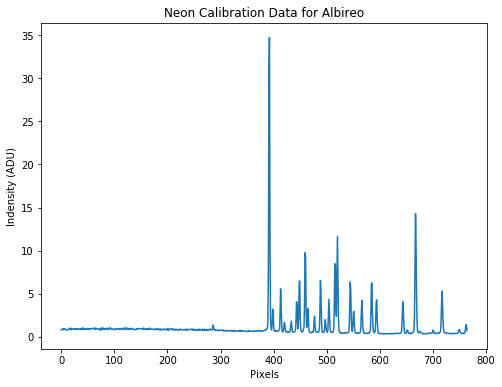

In [56]:
#Wavelength solution for Albireo
neon_albireo = np.mean(neon_telescope_corrected[334:344], axis=0)
plt.figure(figsize=(8,6))
plt.plot(neon_albireo)
plt.title('Neon Calibration Data for Albireo')
plt.xlabel('Pixels')
plt.ylabel('Indensity (ADU)')
plt.savefig('neon_albireo.pdf')

#Find the centroids 
#Andy's telescope peak finding function
#Peak calculator using the help
def centfindert(x, threshold,threshold2):
    pixels = np.arange(0,len(x))
    intensity = x
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
    peaksx = np.array(peaksx)
    return peaksx

neon_albireo_centroids = centfindert(neon_albireo,5,5)
print(neon_albireo_centroids)

The measurement error for the wavlength solution for Albireo is 0.8314370584077156 , the uncertinty in the slope is 0.0028458256553113227 , and the uncertainty in the y-intercept is 1.5122738077327464 .


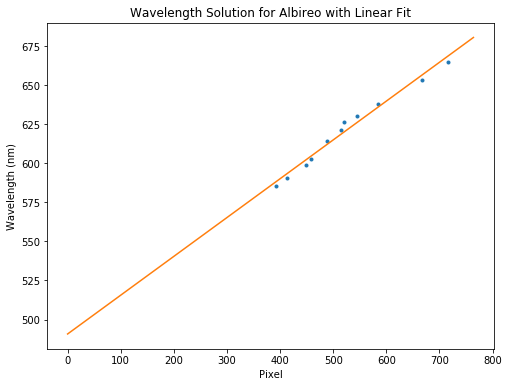

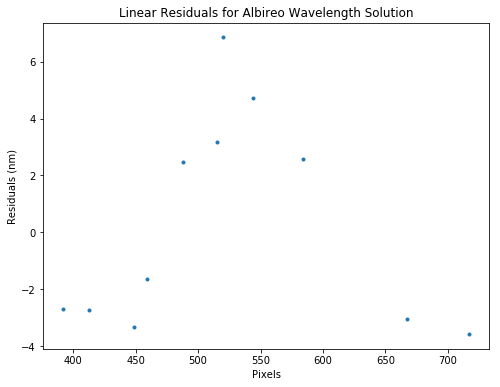

In [57]:
#Albireo continued
#Make array of known neon wavelengths corresponding to centroids
known_neon_albireo = np.array((585.24879, 590.444585, 598.79074, 602.99969, 614.30626, 621.72812, 626.6495, 630.47889, 638.29917, 653.28822, 665.20927))

#Plot linear fit
#Calculate initial conditions
p0_albireo = p0(neon_albireo_centroids, known_neon_albireo, 11) 
p1_albireo = p1(neon_albireo_centroids, known_neon_albireo, 11, p0_albireo) 

#Plot the wavelength solution with the linear fit
x_telescope = np.arange(0, 765) #Make array for x-axis that is the length of the domain
plt.figure(figsize=(8,6))
plt.plot(neon_albireo_centroids, known_neon_albireo, ls = '', marker='o', markersize=3)
plt.plot(x_telescope, model_linear(x_telescope, p0_albireo, p1_albireo))
plt.xlabel('Pixel')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Solution for Albireo with Linear Fit')
plt.savefig('albireo_fit.pdf')

#Residuals from the linear fit
albireo_fit = model_linear(x_telescope, p0_albireo, p1_albireo)
albireo_residuals = []
for i in range(0,11): 
    albireo_residuals.append(-albireo_fit[np.int(neon_albireo_centroids[i])-1] + known_neon_albireo[i])
    
#Plot linear residuals
plt.figure(figsize=(8,6))
plt.plot(neon_albireo_centroids, albireo_residuals, ls='', marker='o', markersize=3)
plt.title('Linear Residuals for Albireo Wavelength Solution')
plt.xlabel('Pixels')
plt.ylabel('Residuals (nm)')
plt.savefig('albireo_residuals.pdf')

#Calculate errors in parameters for linear fit
albireo_mes_err = sigma_squared(albireo_residuals, 11) #fill in n
albireo_slope_err = sigma_m(neon_albireo_centroids, 11, albireo_mes_err) #fill in n
albireo_intercept_err = sigma_c(neon_albireo_centroids, 11, albireo_mes_err) #fill in n
print("The measurement error for the wavlength solution for Albireo is", albireo_mes_err, ", the uncertinty in the slope is", albireo_slope_err, ", and the uncertainty in the y-intercept is", albireo_intercept_err, ".")

[394 415 450 461 490 517 522 546 586 669 719]


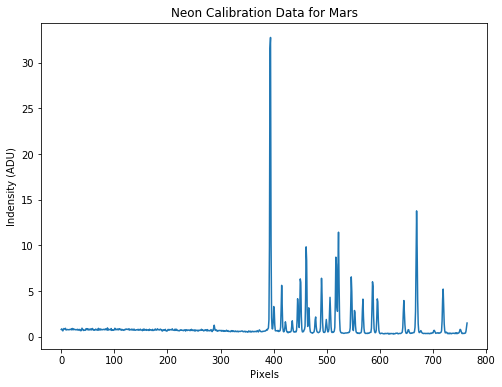

In [58]:
#Wavelength solution for Mars
neon_mars = np.mean(neon_telescope_corrected[397:407], axis=0)
plt.figure(figsize=(8,6))
plt.plot(neon_mars)
plt.title('Neon Calibration Data for Mars')
plt.xlabel('Pixels')
plt.ylabel('Indensity (ADU)')
plt.savefig('neon_mars.pdf')

#Find the centroids 
#Andy's telescope peak finding function
#Peak calculator using the help
def centfindert(x, threshold,threshold2):
    pixels = np.arange(0,len(x))
    intensity = x
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
    peaksx = np.array(peaksx)
    return peaksx

neon_mars_centroids = centfindert(neon_mars,5,5)
print(neon_mars_centroids)

The measurement error for the wavlength solution for Mars is 0.8034000048185859 , the uncertinty in the slope is 0.002795417626878923 , and the uncertainty in the y-intercept is 1.4907702998063546 .


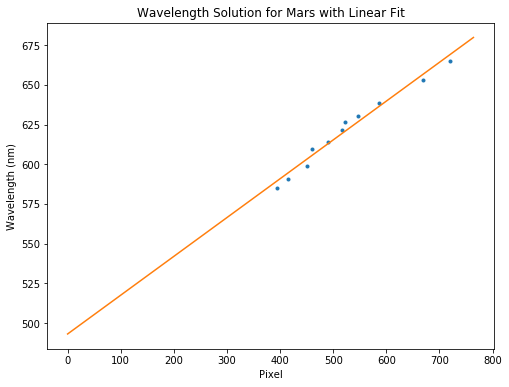

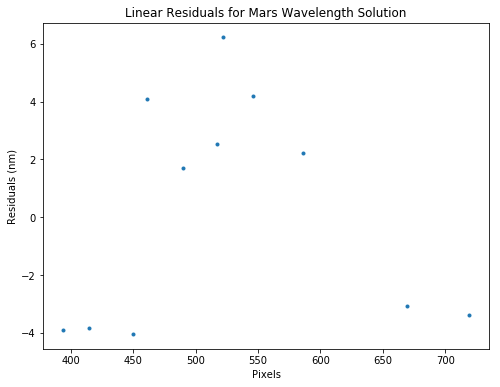

In [59]:
#Mars continued
#Make array of known neon wavelengths corresponding to centroids
known_neon_mars = np.array((585.24879, 590.444585, 598.79074, 609.61631, 614.30626, 621.72812, 626.6495, 630.47889, 638.29917, 653.28822, 665.20927))

#Plot linear fit
#Calculate initial conditions
p0_mars = p0(neon_mars_centroids, known_neon_mars, 11) 
p1_mars = p1(neon_mars_centroids, known_neon_mars, 11, p0_mars) 

#Plot the wavelength solution with the linear fit
x_telescope = np.arange(0, 765) #Make array for x-axis that is the length of the domain
plt.figure(figsize=(8,6))
plt.plot(neon_mars_centroids, known_neon_mars, ls = '', marker='o', markersize=3)
plt.plot(x_telescope, model_linear(x_telescope, p0_mars, p1_mars))
plt.xlabel('Pixel')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Solution for Mars with Linear Fit')
plt.savefig('mars_fit.pdf')

#Residuals from the linear fit
mars_fit = model_linear(x_telescope, p0_mars, p1_mars)
mars_residuals = []
for i in range(0,11): 
    mars_residuals.append(-mars_fit[np.int(neon_mars_centroids[i])-1] + known_neon_mars[i])
    
#Plot linear residuals
plt.figure(figsize=(8,6))
plt.plot(neon_mars_centroids, mars_residuals, ls='', marker='o', markersize=3)
plt.title('Linear Residuals for Mars Wavelength Solution')
plt.xlabel('Pixels')
plt.ylabel('Residuals (nm)')
plt.savefig('mars_residuals.pdf')

#Calculate errors in parameters for linear fit
mars_mes_err = sigma_squared(mars_residuals, 11) #fill in n
mars_slope_err = sigma_m(neon_mars_centroids, 11, mars_mes_err) #fill in n
mars_intercept_err = sigma_c(neon_mars_centroids, 11, mars_mes_err) #fill in n
print("The measurement error for the wavlength solution for Mars is", mars_mes_err, ", the uncertinty in the slope is", mars_slope_err, ", and the uncertainty in the y-intercept is", mars_intercept_err, ".")

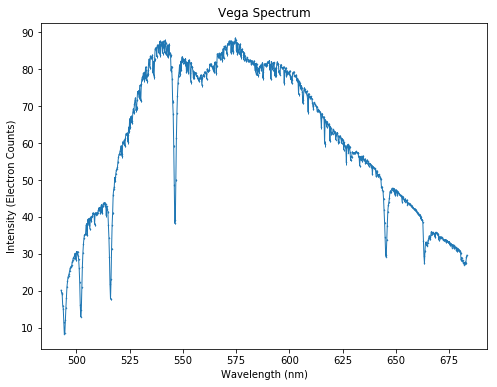

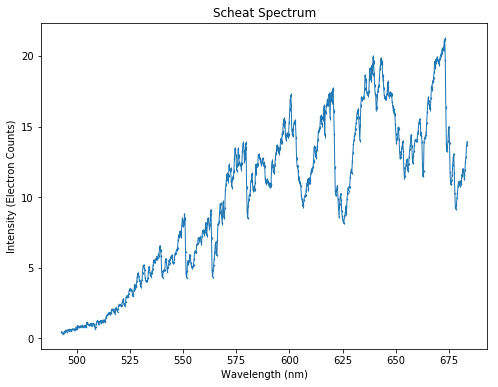

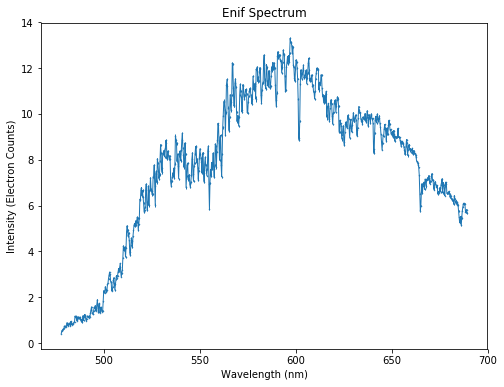

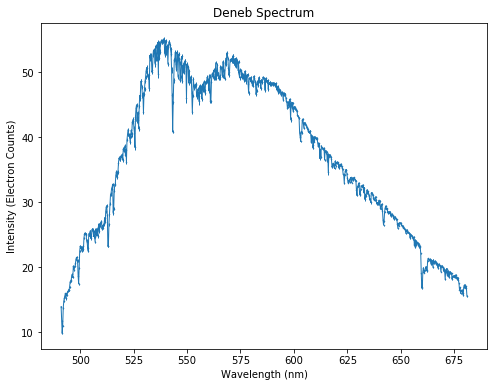

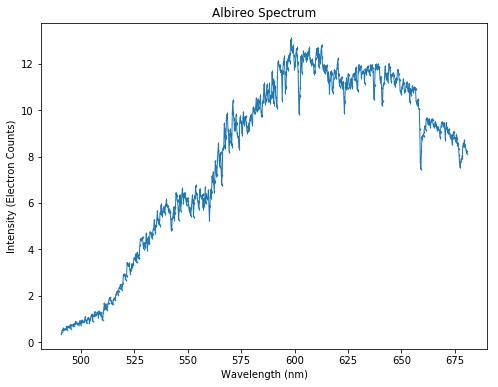

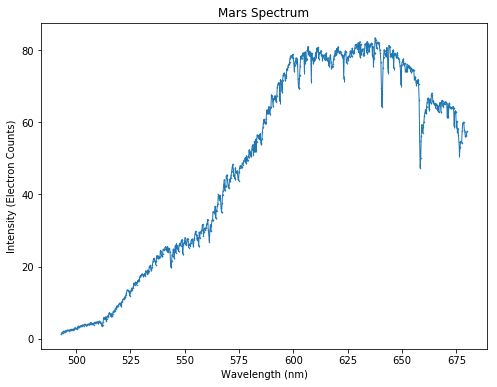

In [60]:
#Shift x-axis to wavelength using wavelength calibration obtained above
plt.figure(figsize=(8,6))
plt.errorbar(vega_fit, vega_mean, xerr=None, yerr=vega_err, marker='o', markersize=0.5, lw=1)
plt.title('Vega Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electron Counts)')
plt.savefig('vega.pdf')
plt.figure(figsize=(8,6))

plt.errorbar(scheat_fit, scheat_mean, xerr=None, yerr=scheat_err, marker='o', markersize=0.5, lw=1)
plt.title('Scheat Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electron Counts)')
plt.savefig('scheat.pdf')
plt.figure(figsize=(8,6))

plt.errorbar(enif_fit, enif_mean, xerr=None, yerr=enif_err, marker='o', markersize=0.5, lw=1)
plt.title('Enif Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electron Counts)')
plt.savefig('enif.pdf')
plt.figure(figsize=(8,6))

plt.errorbar(deneb_fit, deneb_mean, xerr=None, yerr=deneb_err, marker='o', markersize=0.5, lw=1)
plt.title('Deneb Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electron Counts)')
plt.savefig('deneb.pdf')
plt.figure(figsize=(8,6))

plt.errorbar(albireo_fit, albireo_mean, xerr=None, yerr=albireo_err, marker='o', markersize=0.5, lw=1)
plt.title('Albireo Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electron Counts)')
plt.savefig('albireo.pdf')
plt.figure(figsize=(8,6))

plt.errorbar(mars_fit, mars_mean, xerr=None, yerr=mars_err, marker='o', markersize=0.5, lw=1)
plt.title('Mars Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Electron Counts)')
plt.savefig('mars.pdf')

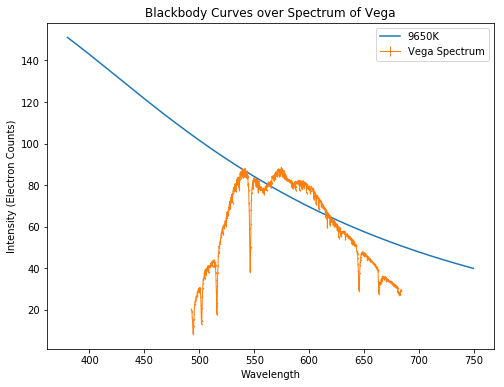

In [137]:
#Blackbody comparison of vega
#Expected temperature of Vega, 9650K
wavelength_vega = np.arange(3.8e-7, 7.5e-7, (7.5e-7 - 3.5e-7)/510)
vega_intensity = planck(wavelength_vega, 9650.)


#Plots
plt.figure(figsize=(8,6))
plt.plot(wavelength_vega*1e9, vega_intensity/2e12, label='9650K')
plt.errorbar(vega_fit, vega_mean, xerr=None, yerr=vega_err, marker='o', markersize=0.5, lw=1, label='Vega Spectrum')
plt.title('Blackbody Curves over Spectrum of Vega')
plt.xlabel('Wavelength')
plt.ylabel('Intensity (Electron Counts)')
plt.legend()
plt.savefig('vega_blackbody.pdf')

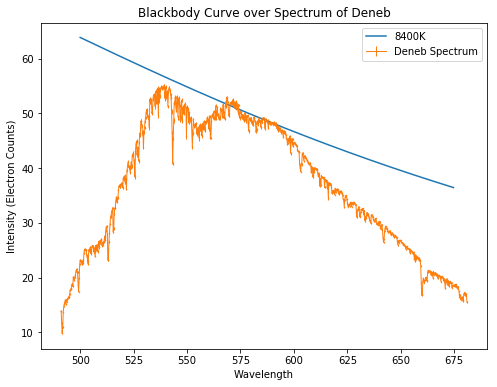

In [140]:
#Blackbody comparison of Deneb
#Expected temperature of Deneb, 8400K
wavelength_deneb = np.arange(5e-7, 6.75e-7, (6.75e-7 - 5e-7)/510)
deneb_intensity = planck(wavelength_deneb, 8400.)


#Plots
plt.figure(figsize=(8,6))
plt.plot(wavelength_deneb*1e9, deneb_intensity/2e12, label='8400K')
plt.errorbar(deneb_fit, deneb_mean, xerr=None, yerr=deneb_err, marker='o', markersize=0.5, lw=1, label='Deneb Spectrum')
plt.title('Blackbody Curve over Spectrum of Deneb')
plt.xlabel('Wavelength')
plt.ylabel('Intensity (Electron Counts)')
plt.legend()
plt.savefig('deneb_blackbody.pdf')